In [48]:
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [49]:
k,gamma,D = 1.0,1.0,1.0
delta_t=0.01
ampl = np.sqrt(2*D*delta_t)
N=100

In [50]:
# random force
w=np.random.normal(0,1,N)

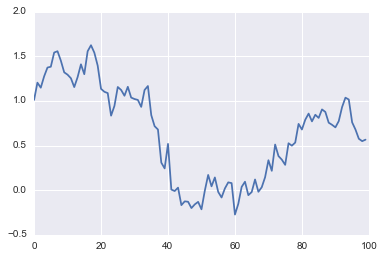

In [51]:
# differential equation x_i = x_(i-1) - k/gamma*x_(i-1) + sqrt(2*D*delta_t)*w_i
from itertools import accumulate
def next_point(x,y):
    return x - k/gamma*x*delta_t + ampl*y

x = np.fromiter(accumulate(w, next_point),np.float)
plt.plot(x)

In [52]:
print("std: ",x.std(),"mean: ",x.mean())

std:  0.532496316895 mean:  0.654516341619


In [53]:
# see http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.signal.fftconvolve.html
from scipy import signal
autocorr = signal.fftconvolve(x, x[::-1], mode='full')

199


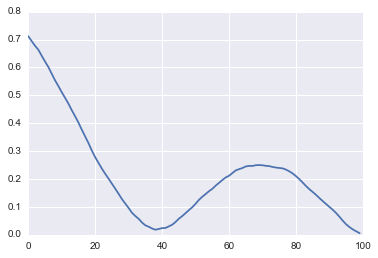

In [54]:
n=len(autocorr)
print(n)
autocorr=autocorr[int((n-1)/2):]*2.0/(n+1)
plt.plot(autocorr[:1000])

In [55]:
import lmfit as lm

[[Model]]
    Model(exponential)
[[Fit Statistics]]
    # function evals   = 42
    # data points      = 100
    # variables        = 2
    chi-square         = 1.324
    reduced chi-square = 0.014
    Akaike info crit   = -426.462
    Bayesian info crit = -421.252
[[Variables]]
    amplitude:   0.64358599 +/- 0.041122 (6.39%) (init= 0.3133315)
    decay:       30.6652637 +/- 2.876530 (9.38%) (init= 65.03108)
[[Correlations]] (unreported correlations are <  0.250)
    C(amplitude, decay)          = -0.703 



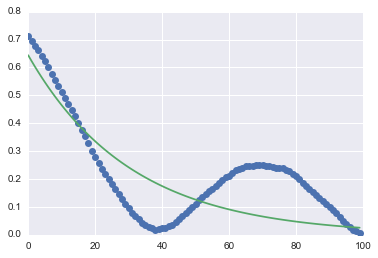

In [56]:
from lmfit.models import ExponentialModel

mod = ExponentialModel()
y = autocorr[:100]
t = np.arange(100)

pars = mod.guess(y, x=t)
out  = mod.fit(y, pars, x=t)
print(out.fit_report(min_correl=0.25))

plt.plot(t,y,"o")
plt.plot(t,out.best_fit)

In [57]:
# now lets model this data using pymc
import pymc3 as pm

In [58]:
# define the model/function for diffusion in a harmonic potential
DHP_model = pm.Model()
with DHP_model:
    t = pm.Uniform('t', 0.1, 20)
    A = pm.Uniform('A', 0.1, 10)
    
    S=1-pm.exp(-4*delta_t/t)
    
    s=pm.exp(-2*delta_t/t)
        
    path=pm.Normal('path_0',mu=0, tau=1/A, observed=x[0])
    for i in range(1,N):
        path = pm.Normal('path_%i' % i,
                            mu=path*s,
                            tau=1/A/S,
                            observed=x[i])


Applied interval-transform to t and added transformed t_interval to model.
Applied interval-transform to A and added transformed A_interval to model.


In [59]:
#with DHP_model:
#    start = pm.find_MAP()
#    print(start)

In [ ]:
with DHP_model:
    trace = pm.sample(10000)

Assigned NUTS to t_interval
Assigned NUTS to A_interval


INFO (theano.gof.compilelock): Refreshing lock /Users/hstrey/.theano/compiledir_Darwin-15.4.0-x86_64-i386-64bit-i386-3.5.1-64/lock_dir/lock
INFO (theano.gof.compilelock): Refreshing lock /Users/hstrey/.theano/compiledir_Darwin-15.4.0-x86_64-i386-64bit-i386-3.5.1-64/lock_dir/lock


00001	#include <Python.h>
00002	#include <iostream>
00003	#include "theano_mod_helper.h"
00004	#include <math.h>
00005	#include <numpy/arrayobject.h>
00006	#include <numpy/arrayscalars.h>
00007	#include <vector>
00008	#include <algorithm>
00009	//////////////////////
00010	////  Support Code
00011	//////////////////////
00012	
00013	
00014	    namespace {
00015	    struct __struct_compiled_op_m27e81858ce46413507672ebdc6203820 {
00016	        PyObject* __ERROR;
00017	
00018	        PyObject* storage_V3;
00019	PyObject* storage_V5;
00020	PyObject* storage_V7;
00021	PyObject* storage_V9;
00022	PyObject* storage_V11;
00023	PyObject* storage_V13;
00024	PyObject* storage_V15;
00025	PyObject* storage_V17;
00026	PyObject* storage_V19;
00027	PyObject* storage_V21;
00028	PyObject* storage_V23;
00029	PyObject* storage_V25;
00030	PyObject* storage_V27;
00031	PyObject* storage_V29;
00032	PyObject* storage_V31;
00033	PyObject* storage_V33;
00034	PyObject* storage_V35;
00035	PyObject* storage_V37;
00

/Users/hstrey/.theano/compiledir_Darwin-15.4.0-x86_64-i386-64bit-i386-3.5.1-64/tmpszybq27a/mod.cpp:27067:32: fatal error: bracket nesting level exceeded maximum of 256
        if (!PyErr_Occurred()) {
                               ^
/Users/hstrey/.theano/compiledir_Darwin-15.4.0-x86_64-i386-64bit-i386-3.5.1-64/tmpszybq27a/mod.cpp:27067:32: note: use -fbracket-depth=N to increase maximum nesting level
1 error generated.




43577	npy_float64 V845_77_tmp1;
43578	V845_77_tmp1 = V203_i * V845_tmp7;
43579	V845_tmp78 = V207_i - V845_77_tmp1;
43580	}
43581	
43582	npy_float64 V845_tmp79;
43583	{
43584	npy_float64 V845_78_tmp1;
43585	V845_78_tmp1 = V199_i * V845_tmp7;
43586	V845_tmp79 = V203_i - V845_78_tmp1;
43587	}
43588	
43589	npy_float64 V845_tmp80;
43590	{
43591	npy_float64 V845_79_tmp1;
43592	V845_79_tmp1 = V195_i * V845_tmp7;
43593	V845_tmp80 = V199_i - V845_79_tmp1;
43594	}
43595	
43596	npy_float64 V845_tmp81;
43597	{
43598	npy_float64 V845_80_tmp1;
43599	V845_80_tmp1 = V191_i * V845_tmp7;
43600	V845_tmp81 = V195_i - V845_80_tmp1;
43601	}
43602	
43603	npy_float64 V845_tmp82;
43604	{
43605	npy_float64 V845_81_tmp1;
43606	V845_81_tmp1 = V187_i * V845_tmp7;
43607	V845_tmp82 = V191_i - V845_81_tmp1;
43608	}
43609	
43610	npy_float64 V845_tmp83;
43611	{
43612	npy_float64 V845_82_tmp1;
43613	V845_82_tmp1 = V183_i * V845_tmp7;
43614	V845_tmp83 = V187_i - V845_82_tmp1;
43615	}
43616	
43617	npy_float64 V845_tmp84;

Exception: ('The following error happened while compiling the node', Elemwise{Composite{((i0 * ((scalar_sigmoid((-i1)) * scalar_sigmoid((-i1)) * Composite{((i0 * i1) + (i2 * i3 * i1))}(i2, i3, i4, i5)) + (i4 * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * scalar_sigmoid((-i1)) * i6 * i7)) * i3) + (i5 * ((scalar_sigmoid(i1) * scalar_sigmoid(i1) * i0 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i4))) + (scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * i0 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * i0 * i5 * i4) + (i8 * (((scalar_sigmoid((-i1)) * i9 * ((-(((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i19 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i23 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i25 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i27 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i29 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i31 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i33 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i35 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i37 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i39 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i41 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i43 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i45 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i47 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i49 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i51 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i53 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i55 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i57 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i59 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i61 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i63 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i65 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i67 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i69 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i71 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i73 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i75 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i77 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i79 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i81 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i83 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i85 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i87 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i89 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i91 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i93 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i95 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i97 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i99 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i101 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i103 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i105 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i107 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i109 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i111 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i113 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i115 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i117 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i119 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i121 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i123 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i125 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i127 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i129 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i131 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i133 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i135 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i137 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i139 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i141 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i143 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i145 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i147 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i149 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i151 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i153 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i155 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i157 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i159 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i161 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i163 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i165 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i167 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i169 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i171 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i173 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i175 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i177 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i179 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i181 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i183 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i185 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i187 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i189 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i191 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i193 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i195 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i197 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i199 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i201 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i203 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i205 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i207 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i209 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i211 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i213 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i215 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i217 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))))) + Composite{((i0 * i1 * i2 * i3 * i4) / i5)}(i12, (i16 + i17), Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)))) / sqr(i13)) + ((scalar_sigmoid(i1) * i219 * Composite{((((-(Switch(i0, ((i1 * i2 * i3 * i4) / i5), i6) + Switch(i0, ((i7 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i10 * i2 * i3 * i11) / i5), i6) + Switch(i0, ((i12 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i13 * i2 * i3 * i14) / i5), i6) + Switch(i0, ((i15 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i16 * i2 * i3 * i17) / i5), i6) + Switch(i0, ((i18 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i19 * i2 * i3 * i20) / i5), i6) + Switch(i0, ((i21 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i22 * i2 * i3 * i23) / i5), i6) + Switch(i0, ((i24 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i25 * i2 * i3 * i26) / i5), i6) + Switch(i0, ((i27 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i28 * i2 * i3 * i29) / i5), i6) + Switch(i0, ((i30 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i31 * i2 * i3 * i32) / i5), i6) + Switch(i0, ((i33 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i34 * i2 * i3 * i35) / i5), i6) + Switch(i0, ((i36 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i37 * i2 * i3 * i38) / i5), i6) + Switch(i0, ((i39 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i40 * i2 * i3 * i41) / i5), i6) + Switch(i0, ((i42 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i43 * i2 * i3 * i44) / i5), i6) + Switch(i0, ((i45 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i46 * i2 * i3 * i47) / i5), i6) + Switch(i0, ((i48 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i49 * i2 * i3 * i50) / i5), i6) + Switch(i0, ((i51 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i52 * i2 * i3 * i53) / i5), i6) + Switch(i0, ((i54 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i55 * i2 * i3 * i56) / i5), i6) + Switch(i0, ((i57 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i58 * i2 * i3 * i59) / i5), i6) + Switch(i0, ((i60 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i61 * i2 * i3 * i62) / i5), i6) + Switch(i0, ((i63 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i64 * i2 * i3 * i65) / i5), i6) + Switch(i0, ((i66 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i67 * i2 * i3 * i68) / i5), i6) + Switch(i0, ((i69 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i70 * i2 * i3 * i71) / i5), i6) + Switch(i0, ((i72 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i73 * i2 * i3 * i74) / i5), i6) + Switch(i0, ((i75 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i76 * i2 * i3 * i77) / i5), i6) + Switch(i0, ((i78 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i79 * i2 * i3 * i80) / i5), i6) + Switch(i0, ((i81 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i82 * i2 * i3 * i83) / i5), i6) + Switch(i0, ((i84 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i85 * i2 * i3 * i86) / i5), i6) + Switch(i0, ((i87 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i88 * i2 * i3 * i89) / i5), i6) + Switch(i0, ((i90 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i91 * i2 * i3 * i92) / i5), i6) + Switch(i0, ((i93 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i94 * i2 * i3 * i95) / i5), i6) + Switch(i0, ((i96 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i97 * i2 * i3 * i98) / i5), i6) + Switch(i0, ((i99 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i100 * i2 * i3 * i101) / i5), i6) + Switch(i0, ((i102 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i103 * i2 * i3 * i104) / i5), i6) + Switch(i0, ((i105 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i106 * i2 * i3 * i107) / i5), i6) + Switch(i0, ((i108 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i109 * i2 * i3 * i110) / i5), i6) + Switch(i0, ((i111 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i112 * i2 * i3 * i113) / i5), i6) + Switch(i0, ((i114 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i115 * i2 * i3 * i116) / i5), i6) + Switch(i0, ((i117 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i118 * i2 * i3 * i119) / i5), i6) + Switch(i0, ((i120 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i121 * i2 * i3 * i122) / i5), i6) + Switch(i0, ((i123 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i124 * i2 * i3 * i125) / i5), i6) + Switch(i0, ((i126 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i127 * i2 * i3 * i128) / i5), i6) + Switch(i0, ((i129 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i130 * i2 * i3 * i131) / i5), i6) + Switch(i0, ((i132 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i133 * i2 * i3 * i134) / i5), i6) + Switch(i0, ((i135 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i136 * i2 * i3 * i137) / i5), i6) + Switch(i0, ((i138 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i139 * i2 * i3 * i140) / i5), i6) + Switch(i0, ((i141 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i142 * i2 * i3 * i143) / i5), i6) + Switch(i0, ((i144 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i145 * i2 * i3 * i146) / i5), i6) + Switch(i0, ((i147 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i148 * i2 * i3 * i149) / i5), i6) + Switch(i0, ((i150 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i151 * i2 * i3 * i152) / i5), i6) + Switch(i0, ((i153 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i154 * i2 * i3 * i155) / i5), i6) + Switch(i0, ((i156 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i157 * i2 * i3 * i158) / i5), i6) + Switch(i0, ((i159 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i160 * i2 * i3 * i161) / i5), i6) + Switch(i0, ((i162 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i163 * i2 * i3 * i164) / i5), i6) + Switch(i0, ((i165 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i166 * i2 * i3 * i167) / i5), i6) + Switch(i0, ((i168 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i169 * i2 * i3 * i170) / i5), i6) + Switch(i0, ((i171 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i172 * i2 * i3 * i173) / i5), i6) + Switch(i0, ((i174 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i175 * i2 * i3 * i176) / i5), i6) + Switch(i0, ((i177 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i178 * i2 * i3 * i179) / i5), i6) + Switch(i0, ((i180 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i181 * i2 * i3 * i182) / i5), i6) + Switch(i0, ((i183 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i184 * i2 * i3 * i185) / i5), i6) + Switch(i0, ((i186 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i187 * i2 * i3 * i188) / i5), i6) + Switch(i0, ((i189 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i190 * i2 * i3 * i191) / i5), i6) + Switch(i0, ((i192 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i193 * i2 * i3 * i194) / i5), i6) + Switch(i0, ((i195 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i196 * i2 * i3 * i197) / i5), i6) + Switch(i0, ((i198 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i199 * i2 * i3 * i200) / i5), i6) + Switch(i0, ((i201 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i202 * i2 * i3 * i203) / i5), i6) + Switch(i0, ((i204 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i205 * i2 * i3 * i206) / i5), i6) + Switch(i0, ((i207 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i208 * i2 * i3 * i209) / i5), i6) + Switch(i0, ((i210 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i211 * i2 * i3 * i212) / i5), i6) + Switch(i0, ((i213 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i214 * i2 * i3 * i215) / i5), i6) + Switch(i0, ((i216 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i217 * i2 * i3 * i218) / i5), i6) + Switch(i0, ((i219 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i220 * i2 * i3 * i221) / i5), i6) + Switch(i0, ((i222 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i223 * i2 * i3 * i224) / i5), i6) + Switch(i0, ((i225 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i226 * i2 * i3 * i227) / i5), i6) + Switch(i0, ((i228 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i229 * i2 * i3 * i230) / i5), i6) + Switch(i0, ((i231 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i232 * i2 * i3 * i233) / i5), i6) + Switch(i0, ((i234 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i235 * i2 * i3 * i236) / i5), i6) + Switch(i0, ((i237 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i238 * i2 * i3 * i239) / i5), i6) + Switch(i0, ((i240 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i241 * i2 * i3 * i242) / i5), i6) + Switch(i0, ((i243 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i244 * i2 * i3 * i245) / i5), i6) + Switch(i0, ((i246 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i247 * i2 * i3 * i248) / i5), i6) + Switch(i0, ((i249 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i250 * i2 * i3 * i251) / i5), i6) + Switch(i0, ((i252 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i253 * i2 * i3 * i254) / i5), i6) + Switch(i0, ((i255 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i256 * i2 * i3 * i257) / i5), i6) + Switch(i0, ((i258 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i259 * i2 * i3 * i260) / i5), i6) + Switch(i0, ((i261 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i262 * i2 * i3 * i263) / i5), i6) + Switch(i0, ((i264 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i265 * i2 * i3 * i266) / i5), i6) + Switch(i0, ((i267 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i268 * i2 * i3 * i269) / i5), i6) + Switch(i0, ((i270 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i271 * i2 * i3 * i272) / i5), i6) + Switch(i0, ((i273 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i274 * i2 * i3 * i275) / i5), i6) + Switch(i0, ((i276 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i277 * i2 * i3 * i278) / i5), i6) + Switch(i0, ((i279 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i280 * i2 * i3 * i281) / i5), i6) + Switch(i0, ((i282 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i283 * i2 * i3 * i284) / i5), i6) + Switch(i0, ((i285 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i286 * i2 * i3 * i287) / i5), i6) + Switch(i0, ((i288 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i289 * i2 * i3 * i290) / i5), i6) + Switch(i0, ((i291 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i292 * i2 * i3 * i293) / i5), i6) + Switch(i0, ((i294 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i295 * i2 * i3 * i296) / i5), i6) + Switch(i0, ((i297 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i298 * i2 * i3 * i299) / i5), i6) + Switch(i0, ((i300 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i301 * i2 * i3 * i302) / i5), i6) + Switch(i0, ((i303 * i2 * i8) / i9), i6)))) * i8) + ((i304 * i2 * (Switch(i0, ((i305 * i299 * i8) / i306), i6) + i307 + i308 + i309 + i310 + i311 + i312 + i313 + i314 + i315 + i316 + i317 + i318 + i319 + i320 + i321 + i322 + i323 + i324 + i325 + i326 + i327 + i328 + i329 + i330 + i331 + i332 + i333 + i334 + i335 + i336 + i337 + i338 + i339 + i340 + i341 + i342 + i343 + i344 + i345 + i346 + i347 + i348 + i349 + i350 + i351 + i352 + i353 + i354 + i355 + i356 + i357 + i358 + i359 + i360 + i361 + i362 + i363 + i364 + i365 + i366 + i367 + i368 + i369 + i370 + i371 + i372 + i373 + i374 + i375 + i376 + i377 + i378 + i379 + i380 + i381 + i382 + i383 + i384 + i385 + i386 + i387 + i388 + i389 + i390 + i391 + i392 + i393 + i394 + i395 + i396 + i397 + i398 + i399 + i400 + i401 + i402 + i403 + i404)) / i405))}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i220, (i16 + i17), exp((i12 / i13)), Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * i10), i14, i221, Composite{exp((i0 / i1))}(i15, i13), (i13 * i13 * i10 * (i11 - exp((i12 / i13)))), i222, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i223, i224, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i225, i226, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i227, i228, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i229, i230, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i231, i232, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i233, i234, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i235, i236, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i237, i238, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i239, i240, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i241, i242, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i243, i244, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i245, i246, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i247, i248, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i249, i250, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i251, i252, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i253, i254, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i255, i256, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i257, i258, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i259, i260, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i261, i262, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i263, i264, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i265, i266, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i267, i268, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i269, i270, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i271, i272, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i273, i274, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i275, i276, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i277, i278, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i279, i280, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i281, i282, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i283, i284, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i285, i286, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i287, i288, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i289, i290, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i291, i292, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i293, i294, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i295, i296, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i297, i298, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i299, i300, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i301, i302, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i303, i304, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i305, i306, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i307, i308, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i309, i310, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i311, i312, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i313, i314, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i315, i316, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i317, i318, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i319, i320, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i321, i322, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i323, i324, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i325, i326, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i327, i328, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i329, i330, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i331, i332, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i333, i334, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i335, i336, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i337, i338, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i339, i340, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i341, i342, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i343, i344, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i345, i346, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i347, i348, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i349, i350, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i351, i352, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i353, i354, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i355, i356, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i357, i358, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i359, i360, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i361, i362, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i363, i364, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i365, i366, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i367, i368, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i369, i370, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i371, i372, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i373, i374, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i375, i376, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i377, i378, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i379, i380, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i381, i382, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i383, i384, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i385, i386, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i387, i388, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i389, i390, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i391, i392, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i393, i394, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i395, i396, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i397, i398, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i399, i400, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i401, i402, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i403, i404, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i405, i406, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i407, i408, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i409, i410, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i411, i412, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i413, i414, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i415, i416, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i417, i219, i418, (i10 * (i11 - exp((i12 / i13)))), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), sqr(i13))) / sqr(i13)) + ((scalar_sigmoid(i1) * exp((i12 / i13)) * i9 * (i16 + i17) * Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14))) / (i13 * i13 * i13)) + ((scalar_sigmoid(i1) * exp((i12 / i13)) * i9 * (i16 + i17) * Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14))) / (i13 * i13 * i13)) + ((scalar_sigmoid(i1) * i15 * (i16 + i17) * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i419 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14))) / (i13 * i13 * i13)) + ((scalar_sigmoid(i1) * i15 * (i16 + i17) * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i419 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14))) / (i13 * i13 * i13)) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i6 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i420 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))))) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i6 * (((i421 * ((-(((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i422 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i423 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i424 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i425 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i426 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i427 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i428 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i429 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i430 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i431 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i432 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i433 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i434 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i435 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i436 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i437 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i438 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i439 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i440 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i441 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i442 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i443 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i444 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i445 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i446 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i447 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i448 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i449 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i450 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i451 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i452 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i453 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i454 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i455 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i456 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i457 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i458 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i459 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i460 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i461 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i462 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i463 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i464 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i465 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i466 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i467 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i468 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i469 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i470 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i471 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i472 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i473 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i474 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i475 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i476 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i477 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i478 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i479 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i480 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i481 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i482 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i483 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i484 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i485 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i486 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i487 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i488 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i489 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i490 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i491 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i492 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i493 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i494 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i495 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i496 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i497 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i498 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i499 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i500 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i501 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i502 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i503 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i504 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i505 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i506 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i507 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i508 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i509 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i510 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i511 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i512 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i513 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i514 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i515 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i516 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i517 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i518 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i519 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i520 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))))) + Composite{((i0 * i1 * i2 * i3 * i4) / i5)}(i12, (i16 + i17), Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)))) / sqr(i13)) + ((i521 * Composite{((((-(Switch(i0, ((i1 * i2 * i3 * i4) / i5), i6) + Switch(i0, ((i7 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i10 * i2 * i3 * i11) / i5), i6) + Switch(i0, ((i12 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i13 * i2 * i3 * i14) / i5), i6) + Switch(i0, ((i15 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i16 * i2 * i3 * i17) / i5), i6) + Switch(i0, ((i18 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i19 * i2 * i3 * i20) / i5), i6) + Switch(i0, ((i21 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i22 * i2 * i3 * i23) / i5), i6) + Switch(i0, ((i24 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i25 * i2 * i3 * i26) / i5), i6) + Switch(i0, ((i27 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i28 * i2 * i3 * i29) / i5), i6) + Switch(i0, ((i30 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i31 * i2 * i3 * i32) / i5), i6) + Switch(i0, ((i33 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i34 * i2 * i3 * i35) / i5), i6) + Switch(i0, ((i36 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i37 * i2 * i3 * i38) / i5), i6) + Switch(i0, ((i39 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i40 * i2 * i3 * i41) / i5), i6) + Switch(i0, ((i42 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i43 * i2 * i3 * i44) / i5), i6) + Switch(i0, ((i45 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i46 * i2 * i3 * i47) / i5), i6) + Switch(i0, ((i48 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i49 * i2 * i3 * i50) / i5), i6) + Switch(i0, ((i51 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i52 * i2 * i3 * i53) / i5), i6) + Switch(i0, ((i54 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i55 * i2 * i3 * i56) / i5), i6) + Switch(i0, ((i57 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i58 * i2 * i3 * i59) / i5), i6) + Switch(i0, ((i60 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i61 * i2 * i3 * i62) / i5), i6) + Switch(i0, ((i63 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i64 * i2 * i3 * i65) / i5), i6) + Switch(i0, ((i66 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i67 * i2 * i3 * i68) / i5), i6) + Switch(i0, ((i69 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i70 * i2 * i3 * i71) / i5), i6) + Switch(i0, ((i72 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i73 * i2 * i3 * i74) / i5), i6) + Switch(i0, ((i75 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i76 * i2 * i3 * i77) / i5), i6) + Switch(i0, ((i78 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i79 * i2 * i3 * i80) / i5), i6) + Switch(i0, ((i81 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i82 * i2 * i3 * i83) / i5), i6) + Switch(i0, ((i84 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i85 * i2 * i3 * i86) / i5), i6) + Switch(i0, ((i87 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i88 * i2 * i3 * i89) / i5), i6) + Switch(i0, ((i90 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i91 * i2 * i3 * i92) / i5), i6) + Switch(i0, ((i93 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i94 * i2 * i3 * i95) / i5), i6) + Switch(i0, ((i96 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i97 * i2 * i3 * i98) / i5), i6) + Switch(i0, ((i99 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i100 * i2 * i3 * i101) / i5), i6) + Switch(i0, ((i102 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i103 * i2 * i3 * i104) / i5), i6) + Switch(i0, ((i105 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i106 * i2 * i3 * i107) / i5), i6) + Switch(i0, ((i108 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i109 * i2 * i3 * i110) / i5), i6) + Switch(i0, ((i111 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i112 * i2 * i3 * i113) / i5), i6) + Switch(i0, ((i114 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i115 * i2 * i3 * i116) / i5), i6) + Switch(i0, ((i117 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i118 * i2 * i3 * i119) / i5), i6) + Switch(i0, ((i120 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i121 * i2 * i3 * i122) / i5), i6) + Switch(i0, ((i123 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i124 * i2 * i3 * i125) / i5), i6) + Switch(i0, ((i126 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i127 * i2 * i3 * i128) / i5), i6) + Switch(i0, ((i129 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i130 * i2 * i3 * i131) / i5), i6) + Switch(i0, ((i132 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i133 * i2 * i3 * i134) / i5), i6) + Switch(i0, ((i135 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i136 * i2 * i3 * i137) / i5), i6) + Switch(i0, ((i138 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i139 * i2 * i3 * i140) / i5), i6) + Switch(i0, ((i141 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i142 * i2 * i3 * i143) / i5), i6) + Switch(i0, ((i144 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i145 * i2 * i3 * i146) / i5), i6) + Switch(i0, ((i147 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i148 * i2 * i3 * i149) / i5), i6) + Switch(i0, ((i150 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i151 * i2 * i3 * i152) / i5), i6) + Switch(i0, ((i153 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i154 * i2 * i3 * i155) / i5), i6) + Switch(i0, ((i156 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i157 * i2 * i3 * i158) / i5), i6) + Switch(i0, ((i159 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i160 * i2 * i3 * i161) / i5), i6) + Switch(i0, ((i162 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i163 * i2 * i3 * i164) / i5), i6) + Switch(i0, ((i165 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i166 * i2 * i3 * i167) / i5), i6) + Switch(i0, ((i168 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i169 * i2 * i3 * i170) / i5), i6) + Switch(i0, ((i171 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i172 * i2 * i3 * i173) / i5), i6) + Switch(i0, ((i174 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i175 * i2 * i3 * i176) / i5), i6) + Switch(i0, ((i177 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i178 * i2 * i3 * i179) / i5), i6) + Switch(i0, ((i180 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i181 * i2 * i3 * i182) / i5), i6) + Switch(i0, ((i183 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i184 * i2 * i3 * i185) / i5), i6) + Switch(i0, ((i186 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i187 * i2 * i3 * i188) / i5), i6) + Switch(i0, ((i189 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i190 * i2 * i3 * i191) / i5), i6) + Switch(i0, ((i192 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i193 * i2 * i3 * i194) / i5), i6) + Switch(i0, ((i195 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i196 * i2 * i3 * i197) / i5), i6) + Switch(i0, ((i198 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i199 * i2 * i3 * i200) / i5), i6) + Switch(i0, ((i201 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i202 * i2 * i3 * i203) / i5), i6) + Switch(i0, ((i204 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i205 * i2 * i3 * i206) / i5), i6) + Switch(i0, ((i207 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i208 * i2 * i3 * i209) / i5), i6) + Switch(i0, ((i210 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i211 * i2 * i3 * i212) / i5), i6) + Switch(i0, ((i213 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i214 * i2 * i3 * i215) / i5), i6) + Switch(i0, ((i216 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i217 * i2 * i3 * i218) / i5), i6) + Switch(i0, ((i219 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i220 * i2 * i3 * i221) / i5), i6) + Switch(i0, ((i222 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i223 * i2 * i3 * i224) / i5), i6) + Switch(i0, ((i225 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i226 * i2 * i3 * i227) / i5), i6) + Switch(i0, ((i228 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i229 * i2 * i3 * i230) / i5), i6) + Switch(i0, ((i231 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i232 * i2 * i3 * i233) / i5), i6) + Switch(i0, ((i234 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i235 * i2 * i3 * i236) / i5), i6) + Switch(i0, ((i237 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i238 * i2 * i3 * i239) / i5), i6) + Switch(i0, ((i240 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i241 * i2 * i3 * i242) / i5), i6) + Switch(i0, ((i243 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i244 * i2 * i3 * i245) / i5), i6) + Switch(i0, ((i246 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i247 * i2 * i3 * i248) / i5), i6) + Switch(i0, ((i249 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i250 * i2 * i3 * i251) / i5), i6) + Switch(i0, ((i252 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i253 * i2 * i3 * i254) / i5), i6) + Switch(i0, ((i255 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i256 * i2 * i3 * i257) / i5), i6) + Switch(i0, ((i258 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i259 * i2 * i3 * i260) / i5), i6) + Switch(i0, ((i261 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i262 * i2 * i3 * i263) / i5), i6) + Switch(i0, ((i264 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i265 * i2 * i3 * i266) / i5), i6) + Switch(i0, ((i267 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i268 * i2 * i3 * i269) / i5), i6) + Switch(i0, ((i270 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i271 * i2 * i3 * i272) / i5), i6) + Switch(i0, ((i273 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i274 * i2 * i3 * i275) / i5), i6) + Switch(i0, ((i276 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i277 * i2 * i3 * i278) / i5), i6) + Switch(i0, ((i279 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i280 * i2 * i3 * i281) / i5), i6) + Switch(i0, ((i282 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i283 * i2 * i3 * i284) / i5), i6) + Switch(i0, ((i285 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i286 * i2 * i3 * i287) / i5), i6) + Switch(i0, ((i288 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i289 * i2 * i3 * i290) / i5), i6) + Switch(i0, ((i291 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i292 * i2 * i3 * i293) / i5), i6) + Switch(i0, ((i294 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i295 * i2 * i3 * i296) / i5), i6) + Switch(i0, ((i297 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i298 * i2 * i3 * i299) / i5), i6) + Switch(i0, ((i300 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i301 * i2 * i3 * i302) / i5), i6) + Switch(i0, ((i303 * i2 * i8) / i9), i6)))) * i8) + ((i304 * i2 * (Switch(i0, ((i305 * i299 * i8) / i306), i6) + i307 + i308 + i309 + i310 + i311 + i312 + i313 + i314 + i315 + i316 + i317 + i318 + i319 + i320 + i321 + i322 + i323 + i324 + i325 + i326 + i327 + i328 + i329 + i330 + i331 + i332 + i333 + i334 + i335 + i336 + i337 + i338 + i339 + i340 + i341 + i342 + i343 + i344 + i345 + i346 + i347 + i348 + i349 + i350 + i351 + i352 + i353 + i354 + i355 + i356 + i357 + i358 + i359 + i360 + i361 + i362 + i363 + i364 + i365 + i366 + i367 + i368 + i369 + i370 + i371 + i372 + i373 + i374 + i375 + i376 + i377 + i378 + i379 + i380 + i381 + i382 + i383 + i384 + i385 + i386 + i387 + i388 + i389 + i390 + i391 + i392 + i393 + i394 + i395 + i396 + i397 + i398 + i399 + i400 + i401 + i402 + i403 + i404)) / i405))}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i220, (i16 + i17), exp((i12 / i13)), Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * i10), i14, i221, Composite{exp((i0 / i1))}(i15, i13), (i13 * i13 * i10 * (i11 - exp((i12 / i13)))), i222, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i223, i224, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i225, i226, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i227, i228, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i229, i230, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i231, i232, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i233, i234, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i235, i236, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i237, i238, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i239, i240, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i241, i242, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i243, i244, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i245, i246, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i247, i248, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i249, i250, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i251, i252, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i253, i254, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i255, i256, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i257, i258, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i259, i260, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i261, i262, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i263, i264, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i265, i266, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i267, i268, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i269, i270, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i271, i272, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i273, i274, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i275, i276, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i277, i278, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i279, i280, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i281, i282, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i283, i284, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i285, i286, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i287, i288, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i289, i290, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i291, i292, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i293, i294, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i295, i296, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i297, i298, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i299, i300, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i301, i302, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i303, i304, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i305, i306, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i307, i308, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i309, i310, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i311, i312, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i313, i314, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i315, i316, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i317, i318, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i319, i320, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i321, i322, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i323, i324, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i325, i326, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i327, i328, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i329, i330, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i331, i332, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i333, i334, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i335, i336, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i337, i338, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i339, i340, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i341, i342, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i343, i344, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i345, i346, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i347, i348, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i349, i350, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i351, i352, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i353, i354, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i355, i356, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i357, i358, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i359, i360, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i361, i362, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i363, i364, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i365, i366, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i367, i368, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i369, i370, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i371, i372, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i373, i374, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i375, i376, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i377, i378, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i379, i380, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i381, i382, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i383, i384, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i385, i386, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i387, i388, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i389, i390, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i391, i392, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i393, i394, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i395, i396, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i397, i398, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i399, i400, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i401, i402, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i403, i404, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i405, i406, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i407, i408, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i409, i410, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i411, i412, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i413, i414, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i415, i416, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i417, i219, i418, (i10 * (i11 - exp((i12 / i13)))), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), sqr(i13)) * i3) / sqr(i13)) + ((i421 * (i16 + i17) * Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)) * exp((i12 / i13)) * i3) / (i13 * i13 * i13)) + ((i421 * (i16 + i17) * Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)) * exp((i12 / i13)) * i3) / (i13 * i13 * i13)) + ((i522 * (i16 + i17) * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i523 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / (i13 * i13 * i13)) + ((i522 * (i16 + i17) * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i523 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / (i13 * i13 * i13)))) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i524 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i8 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i525 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i8 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i525 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))) + (scalar_sigmoid((-i1)) * i8 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i526 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i527 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * Composite{((i0 * i1) + (i2 * i3 * i1))}(i2, i3, i4, i5)) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i8 * Composite{((i0 * i1) + (i2 * i3 * i1))}(i2, i3, i4, i5)) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i7 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i7 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i8 * Composite{((i0 * i1) + (i2 * i3 * i1))}(i2, i3, i4, i5)) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i7 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i7 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * i8 * i2) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * i0 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * i0 * i2) + (((scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * scalar_sigmoid((-i1)) * i8 * i7 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i5 * i4)) * i3))}}[(0, 2)](TensorConstant{-19.9}, t_interval_copy, Reshape{0}.0, Elemwise{exp}.0, Reshape{0}.0, Reshape{0}.0, TensorConstant{-1.0}, Elemwise{Composite{((i0 * i1) + (i0 * i1))}}.0, TensorConstant{19.9}, TensorConstant{0.04}, A, TensorConstant{1.0}, TensorConstant{-0.04}, t, TensorConstant{0}, TensorConstant{-0.02}, Elemwise{Composite{(scalar_sigmoid(i0) * i1 * i2)}}.0, Elemwise{Composite{(scalar_sigmoid(i0) * scalar_sigmoid(i0) * i1 * i2)}}.0, TensorConstant{0.0}, TensorConstant{-0.02021231916859983}, TensorConstant{1.2040168782896488}, TensorConstant{1.0106159584299916}, TensorConstant{0.5}, TensorConstant{-0.0240803..7565792975}, TensorConstant{1.1476805519081736}, TensorConstant{-0.0229536..1038163475}, TensorConstant{1.2742298715848173}, TensorConstant{-0.0254845..7431696347}, TensorConstant{1.3732427113745844}, TensorConstant{-0.02746485422749169}, TensorConstant{1.382600015656935}, TensorConstant{-0.0276520003131387}, TensorConstant{1.541454670860876}, TensorConstant{-0.0308290..3417217523}, TensorConstant{1.5562616956490367}, TensorConstant{-0.0311252..3912980735}, TensorConstant{1.4500718417652667}, TensorConstant{-0.0290014..6835305334}, TensorConstant{1.319673277907267}, TensorConstant{-0.02639346555814534}, TensorConstant{1.2935454135186428}, TensorConstant{-0.0258709..8270372858}, TensorConstant{1.253594257073193}, TensorConstant{-0.02507188514146386}, TensorConstant{1.1544597526560694}, TensorConstant{-0.02308919505312139}, TensorConstant{1.2656703684982475}, TensorConstant{-0.02531340736996495}, TensorConstant{1.4094443815329734}, TensorConstant{-0.02818888763065947}, TensorConstant{1.2987100333457064}, TensorConstant{-0.02597420066691413}, TensorConstant{1.5557618682809733}, TensorConstant{-0.0311152..7365619466}, TensorConstant{1.6234628468182966}, TensorConstant{-0.03246925693636593}, TensorConstant{1.5399228629458062}, TensorConstant{-0.0307984..7258916122}, TensorConstant{1.3946783262917173}, TensorConstant{-0.0278935..6525834346}, TensorConstant{1.1349216882392912}, TensorConstant{-0.0226984..3764785825}, TensorConstant{1.101985939750102}, TensorConstant{-0.02203971879500204}, TensorConstant{1.0870596182672077}, TensorConstant{-0.0217411..2365344154}, TensorConstant{0.8345753778576567}, TensorConstant{-0.0166915..7557153134}, TensorConstant{0.9434830325811748}, TensorConstant{-0.0188696..0651623498}, TensorConstant{1.1554304534682371}, TensorConstant{-0.0231086..9069364742}, TensorConstant{1.1222361486247163}, TensorConstant{-0.02244472297249433}, TensorConstant{1.057435501477529}, TensorConstant{-0.02114871002955058}, TensorConstant{1.157775980773616}, TensorConstant{-0.0231555..9615472322}, TensorConstant{1.036908266000682}, TensorConstant{-0.0207381..5320013643}, TensorConstant{1.0207570998958402}, TensorConstant{-0.0204151..1997916803}, TensorConstant{1.010739591159634}, TensorConstant{-0.02021479182319268}, TensorConstant{0.9327801504185437}, TensorConstant{-0.0186556..3008370873}, TensorConstant{1.1215720724491745}, TensorConstant{-0.02243144144898349}, TensorConstant{1.166450644465586}, TensorConstant{-0.02332901288931172}, TensorConstant{0.8406791821958137}, TensorConstant{-0.0168135..3643916274}, TensorConstant{0.716567931456841}, TensorConstant{-0.01433135862913682}, TensorConstant{0.6791665212464594}, TensorConstant{-0.0135833..0424929188}, TensorConstant{0.30827789241487696}, TensorConstant{-0.0061655..7848297539}, TensorConstant{0.24356745852266992}, TensorConstant{-0.0048713..1704533984}, TensorConstant{0.5186422301907183}, TensorConstant{-0.0103728..4603814366}, TensorConstant{0.006501678664823873}, TensorConstant{-0.0001300..7329647748}, TensorConstant{-0.0098873..2229639589}, TensorConstant{0.00019774..4459279177}, TensorConstant{0.028156836909828717}, TensorConstant{-0.0005631..7381965744}, TensorConstant{-0.16777631543966035}, TensorConstant{0.003355526308793207}, TensorConstant{-0.12531161506655022}, TensorConstant{0.00250623..3013310046}, TensorConstant{-0.12978101771352554}, TensorConstant{0.002595620354270511}, TensorConstant{-0.2006792124458962}, TensorConstant{0.004013584248917924}, TensorConstant{-0.15935479235113603}, TensorConstant{0.00318709..8470227207}, TensorConstant{-0.13101447339456998}, TensorConstant{0.00262028..4678913997}, TensorConstant{-0.2145505970028538}, TensorConstant{0.004291011940057076}, TensorConstant{-0.0053233..5759672589}, TensorConstant{0.00010646..1519345178}, TensorConstant{0.1704795841711515}, TensorConstant{-0.00340959168342303}, TensorConstant{0.04282472340890925}, TensorConstant{-0.0008564..4468178185}, TensorConstant{0.1425231409646264}, TensorConstant{-0.0028504..2819292528}, TensorConstant{-0.0200815..4230513244}, TensorConstant{0.00040163..2846102649}, TensorConstant{-0.08215263206006976}, TensorConstant{0.00164305..6412013952}, TensorConstant{0.019750964805260243}, TensorConstant{-0.0003950..2961052049}, TensorConstant{0.08748945557262924}, TensorConstant{-0.0017497..1114525849}, TensorConstant{0.07886619767324374}, TensorConstant{-0.0015773..9534648748}, TensorConstant{-0.27318391598887914}, TensorConstant{0.005463678319777583}, TensorConstant{-0.1530394257369342}, TensorConstant{0.003060788514738684}, TensorConstant{0.03651517424327305}, TensorConstant{-0.0007303..3484865461}, TensorConstant{0.09461122277829553}, TensorConstant{-0.0018922..4555659108}, TensorConstant{-0.05603906110818041}, TensorConstant{0.00112078..2221636082}, TensorConstant{-0.0213110..6529651725}, TensorConstant{0.00042622..7305930345}, TensorConstant{0.11954415176016797}, TensorConstant{-0.0023908..0352033597}, TensorConstant{-0.01820336126209418}, TensorConstant{0.00036406..2252418836}, TensorConstant{0.03261407312724647}, TensorConstant{-0.0006522..4625449294}, TensorConstant{0.1446389832254958}, TensorConstant{-0.0028927..6645099157}, TensorConstant{0.335320570750973}, TensorConstant{-0.00670641141501946}, TensorConstant{0.2166026150682997}, TensorConstant{-0.0043320..2301365994}, TensorConstant{0.5110003430230434}, TensorConstant{-0.01022000686046087}, TensorConstant{0.3819932232950975}, TensorConstant{-0.00763986446590195}, TensorConstant{0.3416757989717887}, TensorConstant{-0.0068335..5979435774}, TensorConstant{0.28347225101782686}, TensorConstant{-0.0056694..5020356537}, TensorConstant{0.525340663385738}, TensorConstant{-0.01050681326771476}, TensorConstant{0.49858657361488157}, TensorConstant{-0.00997173147229763}, TensorConstant{0.5328317567124522}, TensorConstant{-0.0106566..5134249044}, TensorConstant{0.7421578760316447}, TensorConstant{-0.0148431..7520632895}, TensorConstant{0.6792365734951664}, TensorConstant{-0.0135847..1469903329}, TensorConstant{0.788977961684153}, TensorConstant{-0.01577955923368306}, TensorConstant{0.8577927602546802}, TensorConstant{-0.0171558..5205093603}, TensorConstant{0.7704498897192249}, TensorConstant{-0.0154089..7794384498}, TensorConstant{0.8445688796369595}, TensorConstant{-0.01689137759273919}, TensorConstant{0.8089636112214166}, TensorConstant{-0.01617927222442833}, TensorConstant{0.9045076498308019}, TensorConstant{-0.0180901..2996616038}, TensorConstant{0.876176540439798}, TensorConstant{-0.01752353080879596}, TensorConstant{0.755830054792131}, TensorConstant{-0.0151166..1095842619}, TensorConstant{0.7318708482062124}, TensorConstant{-0.0146374..6964124248}, TensorConstant{0.7033631326643269}, TensorConstant{-0.0140672..2653286538}, TensorConstant{0.7733020034106921}, TensorConstant{-0.0154660..0068213843}, TensorConstant{0.9307651308946548}, TensorConstant{-0.0186153..2617893098}, TensorConstant{1.0359193489025005}, TensorConstant{-0.02071838697805001}, TensorConstant{1.0154160812085946}, TensorConstant{-0.0203083..1624171892}, TensorConstant{0.7596816636867996}, TensorConstant{-0.0151936..3273735992}, TensorConstant{0.6786188605762605}, TensorConstant{-0.01357237721152521}, TensorConstant{0.5757811008393594}, TensorConstant{-0.0115156..2016787188}, TensorConstant{0.5488217770420489}, TensorConstant{-0.01097643554084098}, TensorConstant{0.5656718767285214}, TensorConstant{0.02}, TensorConstant{-0.02195287108168196}, TensorConstant{0.00602410685911185}, TensorConstant{-0.0230312..4033574375}, TensorConstant{0.006630477521675691}, TensorConstant{-0.02714475442305042}, TensorConstant{0.009210471158596443}, TensorConstant{-0.0303872..6547471984}, TensorConstant{0.011542324602838874}, TensorConstant{-0.0406166..3248343784}, TensorConstant{0.020621396359540384}, TensorConstant{-0.04143677395610002}, TensorConstant{0.021462577948611613}, TensorConstant{-0.0372306..5235786196}, TensorConstant{0.01732647457778688}, TensorConstant{-0.0309320..0136427686}, TensorConstant{0.011959919769579802}, TensorConstant{-0.0281345..5306573076}, TensorConstant{0.00989439392782751}, TensorConstant{-0.0292748..3928248496}, TensorConstant{0.010712698769081616}, TensorConstant{-0.0302332..2191685238}, TensorConstant{0.011425581434541513}, TensorConstant{-0.03504706161759192}, TensorConstant{0.01535370660034106}, TensorConstant{-0.0361803..5993232076}, TensorConstant{0.01636268177204881}, TensorConstant{-0.03235854444885666}, TensorConstant{0.013088442485607905}, TensorConstant{-0.03378275518547838}, TensorConstant{0.014265931849024579}, TensorConstant{-0.0308179..5588768996}, TensorConstant{0.011871860651367316}, TensorConstant{-0.0343117..0410187206}, TensorConstant{0.014716168390906864}, TensorConstant{-0.03155911846736612}, TensorConstant{0.012449724480465617}, TensorConstant{-0.0271694..2939806658}, TensorConstant{0.009227246455469093}, TensorConstant{-0.02968631504126579}, TensorConstant{0.011015966259116043}, TensorConstant{-0.0213132..0268498087}, TensorConstant{0.005678193619225557}, TensorConstant{-0.01994346294459526}, TensorConstant{0.004971771427780554}, TensorConstant{-0.02101362653542952}, TensorConstant{0.005519656252131347}, TensorConstant{-0.0113388..0040713074}, TensorConstant{0.00160713..3419422768}, TensorConstant{-0.0136670..1958871548}, TensorConstant{0.002334847032060203}, TensorConstant{-0.0152797289318039}, TensorConstant{0.00291837..4528675645}, TensorConstant{-0.02044001372092174}, TensorConstant{0.005222427011393361}, TensorConstant{-0.0086641..4602731988}, TensorConstant{0.00093833..8570885202}, TensorConstant{-0.01341282283003892}, TensorConstant{0.00224879..7033751657}, TensorConstant{-0.0057855..9329019831}, TensorConstant{0.000418408709370105}, TensorConstant{-0.0013045..9250898589}, TensorConstant{2.12735553..898761e-05}, TensorConstant{0.00072813..4504837672}, TensorConstant{6.62724722..766221e-06}, TensorConstant{-0.0047817..6070406719}, TensorConstant{0.00028581..8440116145}, TensorConstant{0.000852443461186069}, TensorConstant{9.08324818..486065e-06}, TensorConstant{0.00224156..4443272164}, TensorConstant{6.28075273..772756e-05}, TensorConstant{-0.0037844..9111318216}, TensorConstant{0.00017902..6951208537}, TensorConstant{-0.0014606..6969730922}, TensorConstant{2.66671590..331833e-05}, TensorConstant{0.006121577029477368}, TensorConstant{0.00046842..1659781194}, TensorConstant{0.010927356639555167}, TensorConstant{0.00149258..0391003797}, TensorConstant{-0.0031546..9069297496}, TensorConstant{0.00012439..5427087031}, TensorConstant{-0.0034995..2229051697}, TensorConstant{0.00015308..9672790133}, TensorConstant{-0.0007900..5922104098}, TensorConstant{7.80201221..772577e-06}, TensorConstant{0.00328610..2824027905}, TensorConstant{0.00013498..9908794404}, TensorConstant{0.00080326..5692205298}, TensorConstant{8.06538443..884579e-06}, TensorConstant{-0.0057009..5638585056}, TensorConstant{0.00040625..9142084554}, TensorConstant{-0.00171298893635637}, TensorConstant{3.66791387..991595e-05}, TensorConstant{-0.00681918336684606}, TensorConstant{0.00058126..7723833746}, TensorConstant{0.00021293..3038690356}, TensorConstant{5.66768718..256981e-07}, TensorConstant{0.008582023880114153}, TensorConstant{0.00092063..1734856196}, TensorConstant{0.005240578935782799}, TensorConstant{0.00034329..4477712973}, TensorConstant{0.006374191694045441}, TensorConstant{0.00050787..9969054737}, TensorConstant{0.008027168497835848}, TensorConstant{0.00080544..9261581029}, TensorConstant{0.005191240708541022}, TensorConstant{0.00033686..2511751686}, TensorConstant{0.005012464602662009}, TensorConstant{0.00031406..0174117452}, TensorConstant{0.006711052617586414}, TensorConstant{0.00056297..8404501682}, TensorConstant{-0.0011262..4763931488}, TensorConstant{1.58561492..333856e-05}, TensorConstant{0.00039549..8918558354}, TensorConstant{1.95519468..259179e-06}, TensorConstant{-0.0002600..4659295495}, TensorConstant{8.45436509..125189e-07}, TensorConstant{-0.02074568920762873}, TensorConstant{0.005379795258744041}, TensorConstant{-0.0097426..8340906797}, TensorConstant{0.00118650..1370238507}, TensorConstant{-0.0123311..5696595079}, TensorConstant{0.00190070..1790351692}, TensorConstant{-0.0271666..0849858377}, TensorConstant{0.009225343271640348}, TensorConstant{-0.02866271725827364}, TensorConstant{0.010269392007846719}, TensorConstant{-0.03362716728783255}, TensorConstant{0.014134829747548443}, TensorConstant{-0.04665802577862344}, TensorConstant{0.02721214211948362}, TensorConstant{-0.04486288289796698}, TensorConstant{0.025158478273958725}, TensorConstant{-0.0373112..6016741746}, TensorConstant{0.017401576180296818}, TensorConstant{-0.04042958364638536}, TensorConstant{0.02043189042275088}, TensorConstant{-0.0408302..3995833605}, TensorConstant{0.020838901139755325}, TensorConstant{-0.04147633064002729}, TensorConstant{0.021503575042010826}, TensorConstant{-0.0463110..9230944644}, TensorConstant{0.026808904433126172}, TensorConstant{-0.04229742005910116}, TensorConstant{0.022363396795700662}, TensorConstant{-0.04488944594498866}, TensorConstant{0.02518827946560073}, TensorConstant{-0.0462172..8138729484}, TensorConstant{0.02670039065603632}, TensorConstant{-0.0377393..1303246996}, TensorConstant{0.017803204655371406}, TensorConstant{-0.03338301511430627}, TensorConstant{0.013930321226525008}, TensorConstant{-0.04348238473068831}, TensorConstant{0.023633972273344944}, TensorConstant{-0.04407943759000408}, TensorConstant{0.024287460228138307}, TensorConstant{-0.04539686752957165}, TensorConstant{0.025760944768718458}, TensorConstant{-0.05578713305166869}, TensorConstant{0.03890255267655732}, TensorConstant{-0.0615969..4517832245}, TensorConstant{0.04742724847646416}, TensorConstant{-0.06493851387273186}, TensorConstant{0.05271263229998736}, TensorConstant{-0.06223047473123893}, TensorConstant{0.04840789981594209}, TensorConstant{-0.05194840133382826}, TensorConstant{0.03373295501425612}, TensorConstant{-0.05637777526131894}, TensorConstant{0.039730669292697314}, TensorConstant{-0.0506268147399299}, TensorConstant{0.032038429633889795}, TensorConstant{-0.04617839010624278}, TensorConstant{0.02665554641005426}, TensorConstant{-0.05014377028292772}, TensorConstant{0.031429971227337816}, TensorConstant{-0.0517418..6540745715}, TensorConstant{0.033465194736702335}, TensorConstant{-0.05278693111629068}, TensorConstant{0.034830751208450215}, TensorConstant{-0.05800287367061067}, TensorConstant{0.04205416692561025}, TensorConstant{-0.06225046782596147}, TensorConstant{0.0484390093068883}, TensorConstant{-0.0616581..6834435046}, TensorConstant{0.047521650046376235}, TensorConstant{-0.0553040006262774}, TensorConstant{0.038231656065891136}, TensorConstant{-0.05492970845498338}, TensorConstant{0.0377159108868684}, TensorConstant{-0.05096919486339269}, TensorConstant{0.0324732353127812}, TensorConstant{-0.04590722207632695}, TensorConstant{0.026343412984565003}, TensorConstant{-0.04042463833719966}, TensorConstant{0.02042689230866741}, TensorConstant{-0.04816067513158595}, TensorConstant{0.028993132864127018}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916}, TensorConstant{0.7959999999999999}, TensorConstant{-0.02021231916859983}, TensorConstant{-0.0240803..7565792975}, TensorConstant{-0.0229536..1038163475}, TensorConstant{-0.0254845..7431696347}, TensorConstant{-0.02746485422749169}, TensorConstant{-0.0276520003131387}, TensorConstant{-0.0308290..3417217523}, TensorConstant{-0.0311252..3912980735}, TensorConstant{-0.0290014..6835305334}, TensorConstant{-0.02639346555814534}, TensorConstant{-0.0258709..8270372858}, TensorConstant{-0.02507188514146386}, TensorConstant{-0.02308919505312139}, TensorConstant{-0.02531340736996495}, TensorConstant{-0.02818888763065947}, TensorConstant{-0.02597420066691413}, TensorConstant{-0.0311152..7365619466}, TensorConstant{-0.03246925693636593}, TensorConstant{-0.0307984..7258916122}, TensorConstant{-0.0278935..6525834346}, TensorConstant{-0.0226984..3764785825}, TensorConstant{-0.02203971879500204}, TensorConstant{-0.0217411..2365344154}, TensorConstant{-0.0166915..7557153134}, TensorConstant{-0.0188696..0651623498}, TensorConstant{-0.0231086..9069364742}, TensorConstant{-0.02244472297249433}, TensorConstant{-0.02114871002955058}, TensorConstant{-0.0231555..9615472322}, TensorConstant{-0.0207381..5320013643}, TensorConstant{-0.0204151..1997916803}, TensorConstant{-0.02021479182319268}, TensorConstant{-0.0186556..3008370873}, TensorConstant{-0.02243144144898349}, TensorConstant{-0.02332901288931172}, TensorConstant{-0.0168135..3643916274}, TensorConstant{-0.01433135862913682}, TensorConstant{-0.0135833..0424929188}, TensorConstant{-0.0061655..7848297539}, TensorConstant{-0.0048713..1704533984}, TensorConstant{-0.0103728..4603814366}, TensorConstant{-0.0001300..7329647748}, TensorConstant{0.00019774..4459279177}, TensorConstant{-0.0005631..7381965744}, TensorConstant{0.003355526308793207}, TensorConstant{0.00250623..3013310046}, TensorConstant{0.002595620354270511}, TensorConstant{0.004013584248917924}, TensorConstant{0.00318709..8470227207}, TensorConstant{0.00262028..4678913997}, TensorConstant{0.004291011940057076}, TensorConstant{0.00010646..1519345178}, TensorConstant{-0.00340959168342303}, TensorConstant{-0.0008564..4468178185}, TensorConstant{-0.0028504..2819292528}, TensorConstant{0.00040163..2846102649}, TensorConstant{0.00164305..6412013952}, TensorConstant{-0.0003950..2961052049}, TensorConstant{-0.0017497..1114525849}, TensorConstant{-0.0015773..9534648748}, TensorConstant{0.005463678319777583}, TensorConstant{0.003060788514738684}, TensorConstant{-0.0007303..3484865461}, TensorConstant{-0.0018922..4555659108}, TensorConstant{0.00112078..2221636082}, TensorConstant{0.00042622..7305930345}, TensorConstant{-0.0023908..0352033597}, TensorConstant{0.00036406..2252418836}, TensorConstant{-0.0006522..4625449294}, TensorConstant{-0.0028927..6645099157}, TensorConstant{-0.00670641141501946}, TensorConstant{-0.0043320..2301365994}, TensorConstant{-0.01022000686046087}, TensorConstant{-0.00763986446590195}, TensorConstant{-0.0068335..5979435774}, TensorConstant{-0.0056694..5020356537}, TensorConstant{-0.01050681326771476}, TensorConstant{-0.00997173147229763}, TensorConstant{-0.0106566..5134249044}, TensorConstant{-0.0148431..7520632895}, TensorConstant{-0.0135847..1469903329}, TensorConstant{-0.01577955923368306}, TensorConstant{-0.0171558..5205093603}, TensorConstant{-0.0154089..7794384498}, TensorConstant{-0.01689137759273919}, TensorConstant{-0.01617927222442833}, TensorConstant{-0.0180901..2996616038}, TensorConstant{-0.01752353080879596}, TensorConstant{-0.0151166..1095842619}, TensorConstant{-0.0146374..6964124248}, TensorConstant{-0.0140672..2653286538}, TensorConstant{-0.0154660..0068213843}, TensorConstant{-0.0186153..2617893098}, TensorConstant{-0.02071838697805001}, TensorConstant{-0.0203083..1624171892}, TensorConstant{-0.0151936..3273735992}, TensorConstant{-0.01357237721152521}, TensorConstant{-0.0115156..2016787188}, TensorConstant{-0.01097643554084098}, TensorConstant{0.39799999999999996}, TensorConstant{-0.39799999999999996}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916}), '\n', 'Compilation failed (return status=1): /Users/hstrey/.theano/compiledir_Darwin-15.4.0-x86_64-i386-64bit-i386-3.5.1-64/tmpszybq27a/mod.cpp:27067:32: fatal error: bracket nesting level exceeded maximum of 256.         if (!PyErr_Occurred()) {.                                ^. /Users/hstrey/.theano/compiledir_Darwin-15.4.0-x86_64-i386-64bit-i386-3.5.1-64/tmpszybq27a/mod.cpp:27067:32: note: use -fbracket-depth=N to increase maximum nesting level. 1 error generated.. ', '[Elemwise{Composite{((i0 * ((scalar_sigmoid((-i1)) * scalar_sigmoid((-i1)) * Composite{((i0 * i1) + (i2 * i3 * i1))}(i2, i3, i4, i5)) + (i4 * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * scalar_sigmoid((-i1)) * i6 * i7)) * i3) + (i5 * ((scalar_sigmoid(i1) * scalar_sigmoid(i1) * i0 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i4))) + (scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * i0 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * i0 * i5 * i4) + (i8 * (((scalar_sigmoid((-i1)) * i9 * ((-(((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i19 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i23 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i25 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i27 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i29 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i31 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i33 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i35 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i37 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i39 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i41 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i43 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i45 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i47 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i49 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i51 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i53 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i55 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i57 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i59 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i61 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i63 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i65 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i67 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i69 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i71 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i73 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i75 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i77 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i79 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i81 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i83 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i85 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i87 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i89 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i91 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i93 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i95 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i97 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i99 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i101 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i103 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i105 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i107 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i109 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i111 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i113 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i115 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i117 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i119 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i121 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i123 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i125 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i127 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i129 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i131 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i133 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i135 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i137 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i139 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i141 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i143 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i145 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i147 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i149 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i151 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i153 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i155 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i157 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i159 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i161 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i163 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i165 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i167 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i169 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i171 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i173 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i175 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i177 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i179 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i181 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i183 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i185 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i187 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i189 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i191 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i193 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i195 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i197 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i199 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i201 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i203 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i205 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i207 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i209 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i211 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i213 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i215 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i217 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))))) + Composite{((i0 * i1 * i2 * i3 * i4) / i5)}(i12, (i16 + i17), Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)))) / sqr(i13)) + ((scalar_sigmoid(i1) * i219 * Composite{((((-(Switch(i0, ((i1 * i2 * i3 * i4) / i5), i6) + Switch(i0, ((i7 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i10 * i2 * i3 * i11) / i5), i6) + Switch(i0, ((i12 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i13 * i2 * i3 * i14) / i5), i6) + Switch(i0, ((i15 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i16 * i2 * i3 * i17) / i5), i6) + Switch(i0, ((i18 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i19 * i2 * i3 * i20) / i5), i6) + Switch(i0, ((i21 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i22 * i2 * i3 * i23) / i5), i6) + Switch(i0, ((i24 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i25 * i2 * i3 * i26) / i5), i6) + Switch(i0, ((i27 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i28 * i2 * i3 * i29) / i5), i6) + Switch(i0, ((i30 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i31 * i2 * i3 * i32) / i5), i6) + Switch(i0, ((i33 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i34 * i2 * i3 * i35) / i5), i6) + Switch(i0, ((i36 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i37 * i2 * i3 * i38) / i5), i6) + Switch(i0, ((i39 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i40 * i2 * i3 * i41) / i5), i6) + Switch(i0, ((i42 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i43 * i2 * i3 * i44) / i5), i6) + Switch(i0, ((i45 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i46 * i2 * i3 * i47) / i5), i6) + Switch(i0, ((i48 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i49 * i2 * i3 * i50) / i5), i6) + Switch(i0, ((i51 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i52 * i2 * i3 * i53) / i5), i6) + Switch(i0, ((i54 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i55 * i2 * i3 * i56) / i5), i6) + Switch(i0, ((i57 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i58 * i2 * i3 * i59) / i5), i6) + Switch(i0, ((i60 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i61 * i2 * i3 * i62) / i5), i6) + Switch(i0, ((i63 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i64 * i2 * i3 * i65) / i5), i6) + Switch(i0, ((i66 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i67 * i2 * i3 * i68) / i5), i6) + Switch(i0, ((i69 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i70 * i2 * i3 * i71) / i5), i6) + Switch(i0, ((i72 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i73 * i2 * i3 * i74) / i5), i6) + Switch(i0, ((i75 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i76 * i2 * i3 * i77) / i5), i6) + Switch(i0, ((i78 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i79 * i2 * i3 * i80) / i5), i6) + Switch(i0, ((i81 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i82 * i2 * i3 * i83) / i5), i6) + Switch(i0, ((i84 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i85 * i2 * i3 * i86) / i5), i6) + Switch(i0, ((i87 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i88 * i2 * i3 * i89) / i5), i6) + Switch(i0, ((i90 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i91 * i2 * i3 * i92) / i5), i6) + Switch(i0, ((i93 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i94 * i2 * i3 * i95) / i5), i6) + Switch(i0, ((i96 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i97 * i2 * i3 * i98) / i5), i6) + Switch(i0, ((i99 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i100 * i2 * i3 * i101) / i5), i6) + Switch(i0, ((i102 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i103 * i2 * i3 * i104) / i5), i6) + Switch(i0, ((i105 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i106 * i2 * i3 * i107) / i5), i6) + Switch(i0, ((i108 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i109 * i2 * i3 * i110) / i5), i6) + Switch(i0, ((i111 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i112 * i2 * i3 * i113) / i5), i6) + Switch(i0, ((i114 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i115 * i2 * i3 * i116) / i5), i6) + Switch(i0, ((i117 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i118 * i2 * i3 * i119) / i5), i6) + Switch(i0, ((i120 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i121 * i2 * i3 * i122) / i5), i6) + Switch(i0, ((i123 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i124 * i2 * i3 * i125) / i5), i6) + Switch(i0, ((i126 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i127 * i2 * i3 * i128) / i5), i6) + Switch(i0, ((i129 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i130 * i2 * i3 * i131) / i5), i6) + Switch(i0, ((i132 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i133 * i2 * i3 * i134) / i5), i6) + Switch(i0, ((i135 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i136 * i2 * i3 * i137) / i5), i6) + Switch(i0, ((i138 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i139 * i2 * i3 * i140) / i5), i6) + Switch(i0, ((i141 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i142 * i2 * i3 * i143) / i5), i6) + Switch(i0, ((i144 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i145 * i2 * i3 * i146) / i5), i6) + Switch(i0, ((i147 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i148 * i2 * i3 * i149) / i5), i6) + Switch(i0, ((i150 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i151 * i2 * i3 * i152) / i5), i6) + Switch(i0, ((i153 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i154 * i2 * i3 * i155) / i5), i6) + Switch(i0, ((i156 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i157 * i2 * i3 * i158) / i5), i6) + Switch(i0, ((i159 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i160 * i2 * i3 * i161) / i5), i6) + Switch(i0, ((i162 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i163 * i2 * i3 * i164) / i5), i6) + Switch(i0, ((i165 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i166 * i2 * i3 * i167) / i5), i6) + Switch(i0, ((i168 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i169 * i2 * i3 * i170) / i5), i6) + Switch(i0, ((i171 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i172 * i2 * i3 * i173) / i5), i6) + Switch(i0, ((i174 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i175 * i2 * i3 * i176) / i5), i6) + Switch(i0, ((i177 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i178 * i2 * i3 * i179) / i5), i6) + Switch(i0, ((i180 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i181 * i2 * i3 * i182) / i5), i6) + Switch(i0, ((i183 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i184 * i2 * i3 * i185) / i5), i6) + Switch(i0, ((i186 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i187 * i2 * i3 * i188) / i5), i6) + Switch(i0, ((i189 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i190 * i2 * i3 * i191) / i5), i6) + Switch(i0, ((i192 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i193 * i2 * i3 * i194) / i5), i6) + Switch(i0, ((i195 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i196 * i2 * i3 * i197) / i5), i6) + Switch(i0, ((i198 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i199 * i2 * i3 * i200) / i5), i6) + Switch(i0, ((i201 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i202 * i2 * i3 * i203) / i5), i6) + Switch(i0, ((i204 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i205 * i2 * i3 * i206) / i5), i6) + Switch(i0, ((i207 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i208 * i2 * i3 * i209) / i5), i6) + Switch(i0, ((i210 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i211 * i2 * i3 * i212) / i5), i6) + Switch(i0, ((i213 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i214 * i2 * i3 * i215) / i5), i6) + Switch(i0, ((i216 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i217 * i2 * i3 * i218) / i5), i6) + Switch(i0, ((i219 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i220 * i2 * i3 * i221) / i5), i6) + Switch(i0, ((i222 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i223 * i2 * i3 * i224) / i5), i6) + Switch(i0, ((i225 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i226 * i2 * i3 * i227) / i5), i6) + Switch(i0, ((i228 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i229 * i2 * i3 * i230) / i5), i6) + Switch(i0, ((i231 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i232 * i2 * i3 * i233) / i5), i6) + Switch(i0, ((i234 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i235 * i2 * i3 * i236) / i5), i6) + Switch(i0, ((i237 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i238 * i2 * i3 * i239) / i5), i6) + Switch(i0, ((i240 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i241 * i2 * i3 * i242) / i5), i6) + Switch(i0, ((i243 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i244 * i2 * i3 * i245) / i5), i6) + Switch(i0, ((i246 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i247 * i2 * i3 * i248) / i5), i6) + Switch(i0, ((i249 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i250 * i2 * i3 * i251) / i5), i6) + Switch(i0, ((i252 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i253 * i2 * i3 * i254) / i5), i6) + Switch(i0, ((i255 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i256 * i2 * i3 * i257) / i5), i6) + Switch(i0, ((i258 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i259 * i2 * i3 * i260) / i5), i6) + Switch(i0, ((i261 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i262 * i2 * i3 * i263) / i5), i6) + Switch(i0, ((i264 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i265 * i2 * i3 * i266) / i5), i6) + Switch(i0, ((i267 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i268 * i2 * i3 * i269) / i5), i6) + Switch(i0, ((i270 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i271 * i2 * i3 * i272) / i5), i6) + Switch(i0, ((i273 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i274 * i2 * i3 * i275) / i5), i6) + Switch(i0, ((i276 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i277 * i2 * i3 * i278) / i5), i6) + Switch(i0, ((i279 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i280 * i2 * i3 * i281) / i5), i6) + Switch(i0, ((i282 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i283 * i2 * i3 * i284) / i5), i6) + Switch(i0, ((i285 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i286 * i2 * i3 * i287) / i5), i6) + Switch(i0, ((i288 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i289 * i2 * i3 * i290) / i5), i6) + Switch(i0, ((i291 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i292 * i2 * i3 * i293) / i5), i6) + Switch(i0, ((i294 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i295 * i2 * i3 * i296) / i5), i6) + Switch(i0, ((i297 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i298 * i2 * i3 * i299) / i5), i6) + Switch(i0, ((i300 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i301 * i2 * i3 * i302) / i5), i6) + Switch(i0, ((i303 * i2 * i8) / i9), i6)))) * i8) + ((i304 * i2 * (Switch(i0, ((i305 * i299 * i8) / i306), i6) + i307 + i308 + i309 + i310 + i311 + i312 + i313 + i314 + i315 + i316 + i317 + i318 + i319 + i320 + i321 + i322 + i323 + i324 + i325 + i326 + i327 + i328 + i329 + i330 + i331 + i332 + i333 + i334 + i335 + i336 + i337 + i338 + i339 + i340 + i341 + i342 + i343 + i344 + i345 + i346 + i347 + i348 + i349 + i350 + i351 + i352 + i353 + i354 + i355 + i356 + i357 + i358 + i359 + i360 + i361 + i362 + i363 + i364 + i365 + i366 + i367 + i368 + i369 + i370 + i371 + i372 + i373 + i374 + i375 + i376 + i377 + i378 + i379 + i380 + i381 + i382 + i383 + i384 + i385 + i386 + i387 + i388 + i389 + i390 + i391 + i392 + i393 + i394 + i395 + i396 + i397 + i398 + i399 + i400 + i401 + i402 + i403 + i404)) / i405))}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i220, (i16 + i17), exp((i12 / i13)), Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * i10), i14, i221, Composite{exp((i0 / i1))}(i15, i13), (i13 * i13 * i10 * (i11 - exp((i12 / i13)))), i222, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i223, i224, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i225, i226, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i227, i228, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i229, i230, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i231, i232, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i233, i234, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i235, i236, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i237, i238, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i239, i240, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i241, i242, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i243, i244, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i245, i246, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i247, i248, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i249, i250, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i251, i252, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i253, i254, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i255, i256, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i257, i258, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i259, i260, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i261, i262, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i263, i264, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i265, i266, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i267, i268, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i269, i270, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i271, i272, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i273, i274, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i275, i276, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i277, i278, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i279, i280, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i281, i282, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i283, i284, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i285, i286, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i287, i288, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i289, i290, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i291, i292, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i293, i294, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i295, i296, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i297, i298, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i299, i300, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i301, i302, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i303, i304, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i305, i306, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i307, i308, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i309, i310, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i311, i312, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i313, i314, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i315, i316, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i317, i318, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i319, i320, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i321, i322, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i323, i324, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i325, i326, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i327, i328, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i329, i330, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i331, i332, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i333, i334, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i335, i336, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i337, i338, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i339, i340, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i341, i342, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i343, i344, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i345, i346, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i347, i348, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i349, i350, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i351, i352, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i353, i354, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i355, i356, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i357, i358, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i359, i360, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i361, i362, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i363, i364, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i365, i366, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i367, i368, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i369, i370, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i371, i372, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i373, i374, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i375, i376, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i377, i378, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i379, i380, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i381, i382, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i383, i384, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i385, i386, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i387, i388, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i389, i390, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i391, i392, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i393, i394, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i395, i396, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i397, i398, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i399, i400, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i401, i402, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i403, i404, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i405, i406, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i407, i408, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i409, i410, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i411, i412, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i413, i414, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i415, i416, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i417, i219, i418, (i10 * (i11 - exp((i12 / i13)))), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), sqr(i13))) / sqr(i13)) + ((scalar_sigmoid(i1) * exp((i12 / i13)) * i9 * (i16 + i17) * Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14))) / (i13 * i13 * i13)) + ((scalar_sigmoid(i1) * exp((i12 / i13)) * i9 * (i16 + i17) * Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14))) / (i13 * i13 * i13)) + ((scalar_sigmoid(i1) * i15 * (i16 + i17) * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i419 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14))) / (i13 * i13 * i13)) + ((scalar_sigmoid(i1) * i15 * (i16 + i17) * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i419 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14))) / (i13 * i13 * i13)) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i6 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i420 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))))) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i6 * (((i421 * ((-(((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i422 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i423 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i424 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i425 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i426 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i427 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i428 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i429 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i430 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i431 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i432 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i433 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i434 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i435 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i436 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i437 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i438 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i439 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i440 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i441 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i442 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i443 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i444 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i445 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i446 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i447 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i448 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i449 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i450 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i451 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i452 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i453 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i454 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i455 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i456 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i457 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i458 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i459 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i460 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i461 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i462 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i463 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i464 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i465 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i466 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i467 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i468 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i469 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i470 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i471 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i472 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i473 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i474 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i475 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i476 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i477 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i478 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i479 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i480 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i481 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i482 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i483 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i484 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i485 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i486 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i487 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i488 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i489 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i490 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i491 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i492 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i493 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i494 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i495 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i496 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i497 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i498 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i499 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i500 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i501 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i502 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i503 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i504 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i505 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i506 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i507 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i508 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i509 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i510 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i511 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i512 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i513 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i514 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i515 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i516 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i517 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i518 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i519 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + ((-(Composite{(Switch(i0, ((i1 * i2 * i3 * i4 * i3 * i5) / i6), i7) + i8)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i15, (i16 + i17), exp((i12 / i13)), i10, i3, sqr(i13), i14, (i18 / i10)) - Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i520 * (i16 + i17) * Composite{exp((i0 / i1))}(i15, i13) * Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)) * exp((i12 / i13)) * i3) / sqr(i13)), i14))) / (i10 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))) + Composite{((i0 * i1 * i2 * (i3 - i4) * i2 * i5) / i6)}(i12, (i16 + i17), exp((i12 / i13)), ((i18 / i10) + Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14) + (i18 / i10)), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), i3, (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))))))) + Composite{((i0 * i1 * i2 * i3 * i4) / i5)}(i12, (i16 + i17), Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)))) / sqr(i13)) + ((i521 * Composite{((((-(Switch(i0, ((i1 * i2 * i3 * i4) / i5), i6) + Switch(i0, ((i7 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i10 * i2 * i3 * i11) / i5), i6) + Switch(i0, ((i12 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i13 * i2 * i3 * i14) / i5), i6) + Switch(i0, ((i15 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i16 * i2 * i3 * i17) / i5), i6) + Switch(i0, ((i18 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i19 * i2 * i3 * i20) / i5), i6) + Switch(i0, ((i21 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i22 * i2 * i3 * i23) / i5), i6) + Switch(i0, ((i24 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i25 * i2 * i3 * i26) / i5), i6) + Switch(i0, ((i27 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i28 * i2 * i3 * i29) / i5), i6) + Switch(i0, ((i30 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i31 * i2 * i3 * i32) / i5), i6) + Switch(i0, ((i33 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i34 * i2 * i3 * i35) / i5), i6) + Switch(i0, ((i36 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i37 * i2 * i3 * i38) / i5), i6) + Switch(i0, ((i39 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i40 * i2 * i3 * i41) / i5), i6) + Switch(i0, ((i42 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i43 * i2 * i3 * i44) / i5), i6) + Switch(i0, ((i45 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i46 * i2 * i3 * i47) / i5), i6) + Switch(i0, ((i48 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i49 * i2 * i3 * i50) / i5), i6) + Switch(i0, ((i51 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i52 * i2 * i3 * i53) / i5), i6) + Switch(i0, ((i54 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i55 * i2 * i3 * i56) / i5), i6) + Switch(i0, ((i57 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i58 * i2 * i3 * i59) / i5), i6) + Switch(i0, ((i60 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i61 * i2 * i3 * i62) / i5), i6) + Switch(i0, ((i63 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i64 * i2 * i3 * i65) / i5), i6) + Switch(i0, ((i66 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i67 * i2 * i3 * i68) / i5), i6) + Switch(i0, ((i69 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i70 * i2 * i3 * i71) / i5), i6) + Switch(i0, ((i72 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i73 * i2 * i3 * i74) / i5), i6) + Switch(i0, ((i75 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i76 * i2 * i3 * i77) / i5), i6) + Switch(i0, ((i78 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i79 * i2 * i3 * i80) / i5), i6) + Switch(i0, ((i81 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i82 * i2 * i3 * i83) / i5), i6) + Switch(i0, ((i84 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i85 * i2 * i3 * i86) / i5), i6) + Switch(i0, ((i87 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i88 * i2 * i3 * i89) / i5), i6) + Switch(i0, ((i90 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i91 * i2 * i3 * i92) / i5), i6) + Switch(i0, ((i93 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i94 * i2 * i3 * i95) / i5), i6) + Switch(i0, ((i96 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i97 * i2 * i3 * i98) / i5), i6) + Switch(i0, ((i99 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i100 * i2 * i3 * i101) / i5), i6) + Switch(i0, ((i102 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i103 * i2 * i3 * i104) / i5), i6) + Switch(i0, ((i105 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i106 * i2 * i3 * i107) / i5), i6) + Switch(i0, ((i108 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i109 * i2 * i3 * i110) / i5), i6) + Switch(i0, ((i111 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i112 * i2 * i3 * i113) / i5), i6) + Switch(i0, ((i114 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i115 * i2 * i3 * i116) / i5), i6) + Switch(i0, ((i117 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i118 * i2 * i3 * i119) / i5), i6) + Switch(i0, ((i120 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i121 * i2 * i3 * i122) / i5), i6) + Switch(i0, ((i123 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i124 * i2 * i3 * i125) / i5), i6) + Switch(i0, ((i126 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i127 * i2 * i3 * i128) / i5), i6) + Switch(i0, ((i129 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i130 * i2 * i3 * i131) / i5), i6) + Switch(i0, ((i132 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i133 * i2 * i3 * i134) / i5), i6) + Switch(i0, ((i135 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i136 * i2 * i3 * i137) / i5), i6) + Switch(i0, ((i138 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i139 * i2 * i3 * i140) / i5), i6) + Switch(i0, ((i141 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i142 * i2 * i3 * i143) / i5), i6) + Switch(i0, ((i144 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i145 * i2 * i3 * i146) / i5), i6) + Switch(i0, ((i147 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i148 * i2 * i3 * i149) / i5), i6) + Switch(i0, ((i150 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i151 * i2 * i3 * i152) / i5), i6) + Switch(i0, ((i153 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i154 * i2 * i3 * i155) / i5), i6) + Switch(i0, ((i156 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i157 * i2 * i3 * i158) / i5), i6) + Switch(i0, ((i159 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i160 * i2 * i3 * i161) / i5), i6) + Switch(i0, ((i162 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i163 * i2 * i3 * i164) / i5), i6) + Switch(i0, ((i165 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i166 * i2 * i3 * i167) / i5), i6) + Switch(i0, ((i168 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i169 * i2 * i3 * i170) / i5), i6) + Switch(i0, ((i171 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i172 * i2 * i3 * i173) / i5), i6) + Switch(i0, ((i174 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i175 * i2 * i3 * i176) / i5), i6) + Switch(i0, ((i177 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i178 * i2 * i3 * i179) / i5), i6) + Switch(i0, ((i180 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i181 * i2 * i3 * i182) / i5), i6) + Switch(i0, ((i183 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i184 * i2 * i3 * i185) / i5), i6) + Switch(i0, ((i186 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i187 * i2 * i3 * i188) / i5), i6) + Switch(i0, ((i189 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i190 * i2 * i3 * i191) / i5), i6) + Switch(i0, ((i192 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i193 * i2 * i3 * i194) / i5), i6) + Switch(i0, ((i195 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i196 * i2 * i3 * i197) / i5), i6) + Switch(i0, ((i198 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i199 * i2 * i3 * i200) / i5), i6) + Switch(i0, ((i201 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i202 * i2 * i3 * i203) / i5), i6) + Switch(i0, ((i204 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i205 * i2 * i3 * i206) / i5), i6) + Switch(i0, ((i207 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i208 * i2 * i3 * i209) / i5), i6) + Switch(i0, ((i210 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i211 * i2 * i3 * i212) / i5), i6) + Switch(i0, ((i213 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i214 * i2 * i3 * i215) / i5), i6) + Switch(i0, ((i216 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i217 * i2 * i3 * i218) / i5), i6) + Switch(i0, ((i219 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i220 * i2 * i3 * i221) / i5), i6) + Switch(i0, ((i222 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i223 * i2 * i3 * i224) / i5), i6) + Switch(i0, ((i225 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i226 * i2 * i3 * i227) / i5), i6) + Switch(i0, ((i228 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i229 * i2 * i3 * i230) / i5), i6) + Switch(i0, ((i231 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i232 * i2 * i3 * i233) / i5), i6) + Switch(i0, ((i234 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i235 * i2 * i3 * i236) / i5), i6) + Switch(i0, ((i237 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i238 * i2 * i3 * i239) / i5), i6) + Switch(i0, ((i240 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i241 * i2 * i3 * i242) / i5), i6) + Switch(i0, ((i243 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i244 * i2 * i3 * i245) / i5), i6) + Switch(i0, ((i246 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i247 * i2 * i3 * i248) / i5), i6) + Switch(i0, ((i249 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i250 * i2 * i3 * i251) / i5), i6) + Switch(i0, ((i252 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i253 * i2 * i3 * i254) / i5), i6) + Switch(i0, ((i255 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i256 * i2 * i3 * i257) / i5), i6) + Switch(i0, ((i258 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i259 * i2 * i3 * i260) / i5), i6) + Switch(i0, ((i261 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i262 * i2 * i3 * i263) / i5), i6) + Switch(i0, ((i264 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i265 * i2 * i3 * i266) / i5), i6) + Switch(i0, ((i267 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i268 * i2 * i3 * i269) / i5), i6) + Switch(i0, ((i270 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i271 * i2 * i3 * i272) / i5), i6) + Switch(i0, ((i273 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i274 * i2 * i3 * i275) / i5), i6) + Switch(i0, ((i276 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i277 * i2 * i3 * i278) / i5), i6) + Switch(i0, ((i279 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i280 * i2 * i3 * i281) / i5), i6) + Switch(i0, ((i282 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i283 * i2 * i3 * i284) / i5), i6) + Switch(i0, ((i285 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i286 * i2 * i3 * i287) / i5), i6) + Switch(i0, ((i288 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i289 * i2 * i3 * i290) / i5), i6) + Switch(i0, ((i291 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i292 * i2 * i3 * i293) / i5), i6) + Switch(i0, ((i294 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i295 * i2 * i3 * i296) / i5), i6) + Switch(i0, ((i297 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i298 * i2 * i3 * i299) / i5), i6) + Switch(i0, ((i300 * i2 * i8) / i9), i6))) + (-(Switch(i0, ((i301 * i2 * i3 * i302) / i5), i6) + Switch(i0, ((i303 * i2 * i8) / i9), i6)))) * i8) + ((i304 * i2 * (Switch(i0, ((i305 * i299 * i8) / i306), i6) + i307 + i308 + i309 + i310 + i311 + i312 + i313 + i314 + i315 + i316 + i317 + i318 + i319 + i320 + i321 + i322 + i323 + i324 + i325 + i326 + i327 + i328 + i329 + i330 + i331 + i332 + i333 + i334 + i335 + i336 + i337 + i338 + i339 + i340 + i341 + i342 + i343 + i344 + i345 + i346 + i347 + i348 + i349 + i350 + i351 + i352 + i353 + i354 + i355 + i356 + i357 + i358 + i359 + i360 + i361 + i362 + i363 + i364 + i365 + i366 + i367 + i368 + i369 + i370 + i371 + i372 + i373 + i374 + i375 + i376 + i377 + i378 + i379 + i380 + i381 + i382 + i383 + i384 + i385 + i386 + i387 + i388 + i389 + i390 + i391 + i392 + i393 + i394 + i395 + i396 + i397 + i398 + i399 + i400 + i401 + i402 + i403 + i404)) / i405))}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i220, (i16 + i17), exp((i12 / i13)), Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), (i13 * i13 * (i11 - exp((i12 / i13))) * (i11 - exp((i12 / i13))) * i10), i14, i221, Composite{exp((i0 / i1))}(i15, i13), (i13 * i13 * i10 * (i11 - exp((i12 / i13)))), i222, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i223, i224, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i225, i226, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i227, i228, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i229, i230, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i231, i232, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i233, i234, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i235, i236, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i237, i238, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i239, i240, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i241, i242, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i243, i244, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i245, i246, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i247, i248, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i249, i250, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i251, i252, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i253, i254, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i255, i256, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i257, i258, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i259, i260, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i261, i262, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i263, i264, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i265, i266, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i267, i268, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i269, i270, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i271, i272, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i273, i274, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i275, i276, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i277, i278, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i279, i280, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i281, i282, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i283, i284, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i285, i286, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i287, i288, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i289, i290, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i291, i292, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i293, i294, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i295, i296, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i297, i298, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i299, i300, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i301, i302, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i303, i304, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i305, i306, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i307, i308, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i309, i310, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i311, i312, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i313, i314, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i315, i316, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i317, i318, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i319, i320, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i321, i322, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i323, i324, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i325, i326, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i327, i328, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i329, i330, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i331, i332, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i333, i334, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i335, i336, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i337, i338, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i339, i340, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i341, i342, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i343, i344, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i345, i346, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i347, i348, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i349, i350, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i351, i352, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i353, i354, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i355, i356, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i357, i358, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i359, i360, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i361, i362, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i363, i364, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i365, i366, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i367, i368, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i369, i370, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i371, i372, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i373, i374, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i375, i376, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i377, i378, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i379, i380, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i381, i382, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i383, i384, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i385, i386, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i387, i388, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i389, i390, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i391, i392, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i393, i394, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i395, i396, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i397, i398, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i399, i400, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i401, i402, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i403, i404, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i405, i406, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i407, i408, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i409, i410, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i411, i412, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i413, i414, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i415, i416, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i417, i219, i418, (i10 * (i11 - exp((i12 / i13)))), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14), sqr(i13)) * i3) / sqr(i13)) + ((i421 * (i16 + i17) * Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)) * exp((i12 / i13)) * i3) / (i13 * i13 * i13)) + ((i421 * (i16 + i17) * Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)) * exp((i12 / i13)) * i3) / (i13 * i13 * i13)) + ((i522 * (i16 + i17) * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i523 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / (i13 * i13 * i13)) + ((i522 * (i16 + i17) * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i523 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / (i13 * i13 * i13)))) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i524 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i8 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i525 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i8 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i525 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))) + (scalar_sigmoid((-i1)) * i8 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i526 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i5 * (Composite{((i0 * i1 * i2 * i3) / i4)}(i12, Composite{((((-(((i0 + i1) - i2) + i0)) / i3) / i3) + (((-(((i0 + i1) - i4) + i0)) / i3) / i3) + (((-(((i0 + i1) - i5) + i0)) / i3) / i3) + (((-(((i0 + i1) - i6) + i0)) / i3) / i3) + (((-(((i0 + i1) - i7) + i0)) / i3) / i3) + (((-(((i0 + i1) - i8) + i0)) / i3) / i3) + (((-(((i0 + i1) - i9) + i0)) / i3) / i3) + (((-(((i0 + i1) - i10) + i0)) / i3) / i3) + (((-(((i0 + i1) - i11) + i0)) / i3) / i3) + (((-(((i0 + i1) - i12) + i0)) / i3) / i3) + (((-(((i0 + i1) - i13) + i0)) / i3) / i3) + (((-(((i0 + i1) - i14) + i0)) / i3) / i3) + (((-(((i0 + i1) - i15) + i0)) / i3) / i3) + (((-(((i0 + i1) - i16) + i0)) / i3) / i3) + (((-(((i0 + i1) - i17) + i0)) / i3) / i3) + (((-(((i0 + i1) - i18) + i0)) / i3) / i3) + (((-(((i0 + i1) - i19) + i0)) / i3) / i3) + (((-(((i0 + i1) - i20) + i0)) / i3) / i3) + (((-(((i0 + i1) - i21) + i0)) / i3) / i3) + (((-(((i0 + i1) - i22) + i0)) / i3) / i3) + (((-(((i0 + i1) - i23) + i0)) / i3) / i3) + (((-(((i0 + i1) - i24) + i0)) / i3) / i3) + (((-(((i0 + i1) - i25) + i0)) / i3) / i3) + (((-(((i0 + i1) - i26) + i0)) / i3) / i3) + (((-(((i0 + i1) - i27) + i0)) / i3) / i3) + (((-(((i0 + i1) - i28) + i0)) / i3) / i3) + (((-(((i0 + i1) - i29) + i0)) / i3) / i3) + (((-(((i0 + i1) - i30) + i0)) / i3) / i3) + (((-(((i0 + i1) - i31) + i0)) / i3) / i3) + (((-(((i0 + i1) - i32) + i0)) / i3) / i3) + (((-(((i0 + i1) - i33) + i0)) / i3) / i3) + (((-(((i0 + i1) - i34) + i0)) / i3) / i3) + (((-(((i0 + i1) - i35) + i0)) / i3) / i3) + (((-(((i0 + i1) - i36) + i0)) / i3) / i3) + (((-(((i0 + i1) - i37) + i0)) / i3) / i3) + (((-(((i0 + i1) - i38) + i0)) / i3) / i3) + (((-(((i0 + i1) - i39) + i0)) / i3) / i3) + (((-(((i0 + i1) - i40) + i0)) / i3) / i3) + (((-(((i0 + i1) - i41) + i0)) / i3) / i3) + (((-(((i0 + i1) - i42) + i0)) / i3) / i3) + (((-(((i0 + i1) - i43) + i0)) / i3) / i3) + (((-(((i0 + i1) - i44) + i0)) / i3) / i3) + (((-(((i0 + i1) - i45) + i0)) / i3) / i3) + (((-(((i0 + i1) - i46) + i0)) / i3) / i3) + (((-(((i0 + i1) - i47) + i0)) / i3) / i3) + (((-(((i0 + i1) - i48) + i0)) / i3) / i3) + (((-(((i0 + i1) - i49) + i0)) / i3) / i3) + (((-(((i0 + i1) - i50) + i0)) / i3) / i3) + (((-(((i0 + i1) - i51) + i0)) / i3) / i3) + (((-(((i0 + i1) - i52) + i0)) / i3) / i3) + (((-(((i0 + i1) - i53) + i0)) / i3) / i3) + (((-(((i0 + i1) - i54) + i0)) / i3) / i3) + (((-(((i0 + i1) - i55) + i0)) / i3) / i3) + (((-(((i0 + i1) - i56) + i0)) / i3) / i3) + (((-(((i0 + i1) - i57) + i0)) / i3) / i3) + (((-(((i0 + i1) - i58) + i0)) / i3) / i3) + (((-(((i0 + i1) - i59) + i0)) / i3) / i3) + (((-(((i0 + i1) - i60) + i0)) / i3) / i3) + (((-(((i0 + i1) - i61) + i0)) / i3) / i3) + (((-(((i0 + i1) - i62) + i0)) / i3) / i3) + (((-(((i0 + i1) - i63) + i0)) / i3) / i3) + (((-(((i0 + i1) - i64) + i0)) / i3) / i3) + (((-(((i0 + i1) - i65) + i0)) / i3) / i3) + (((-(((i0 + i1) - i66) + i0)) / i3) / i3) + (((-(((i0 + i1) - i67) + i0)) / i3) / i3) + (((-(((i0 + i1) - i68) + i0)) / i3) / i3) + (((-(((i0 + i1) - i69) + i0)) / i3) / i3) + (((-(((i0 + i1) - i70) + i0)) / i3) / i3) + (((-(((i0 + i1) - i71) + i0)) / i3) / i3) + (((-(((i0 + i1) - i72) + i0)) / i3) / i3) + (((-(((i0 + i1) - i73) + i0)) / i3) / i3) + (((-(((i0 + i1) - i74) + i0)) / i3) / i3) + (((-(((i0 + i1) - i75) + i0)) / i3) / i3) + (((-(((i0 + i1) - i76) + i0)) / i3) / i3) + (((-(((i0 + i1) - i77) + i0)) / i3) / i3) + (((-(((i0 + i1) - i78) + i0)) / i3) / i3) + (((-(((i0 + i1) - i79) + i0)) / i3) / i3) + (((-(((i0 + i1) - i80) + i0)) / i3) / i3) + (((-(((i0 + i1) - i81) + i0)) / i3) / i3) + (((-(((i0 + i1) - i82) + i0)) / i3) / i3) + (((-(((i0 + i1) - i83) + i0)) / i3) / i3) + (((-(((i0 + i1) - i84) + i0)) / i3) / i3) + (((-(((i0 + i1) - i85) + i0)) / i3) / i3) + (((-(((i0 + i1) - i86) + i0)) / i3) / i3) + (((-(((i0 + i1) - i87) + i0)) / i3) / i3) + (((-(((i0 + i1) - i88) + i0)) / i3) / i3) + (((-(((i0 + i1) - i89) + i0)) / i3) / i3) + (((-(((i0 + i1) - i90) + i0)) / i3) / i3) + (((-(((i0 + i1) - i91) + i0)) / i3) / i3) + (((-(((i0 + i1) - i92) + i0)) / i3) / i3) + (((-(((i0 + i1) - i93) + i0)) / i3) / i3) + (((-(((i0 + i1) - i94) + i0)) / i3) / i3) + (((-(((i0 + i1) - i95) + i0)) / i3) / i3) + (((-(((i0 + i1) - i96) + i0)) / i3) / i3) + (((-(((i0 + i1) - i97) + i0)) / i3) / i3) + (((-(((i0 + i1) - i98) + i0)) / i3) / i3) + (((-(((i0 + i1) - i99) + i0)) / i3) / i3) + (((-(((i0 + i1) - i100) + i0)) / i3) / i3) + (((-(((i0 + i1) - i101) + i0)) / i3) / i3))}((i18 / i10), Composite{Switch(i0, (i1 * i2), i3)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, (i11 - exp((i12 / i13))), i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), (i11 - exp((i12 / i13))), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)), i10, i14), Composite{Switch(i0, ((i1 * sqr(i2)) / i3), i4)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i22, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), i10, i14)), exp((i12 / i13)), i3, sqr(i13)) + ((i219 * (Switch(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), ((i527 * Composite{(i0 - (i1 * i2))}(i20, i21, Composite{exp((i0 / i1))}(i15, i13)) * Composite{exp((i0 / i1))}(i15, i13)) / (i10 * (i11 - exp((i12 / i13))))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i20, Composite{(i0 - (i1 * i2))}(i24, i20, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i24, Composite{(i0 - (i1 * i2))}(i26, i24, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i26, Composite{(i0 - (i1 * i2))}(i28, i26, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i28, Composite{(i0 - (i1 * i2))}(i30, i28, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i30, Composite{(i0 - (i1 * i2))}(i32, i30, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i32, Composite{(i0 - (i1 * i2))}(i34, i32, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i34, Composite{(i0 - (i1 * i2))}(i36, i34, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i36, Composite{(i0 - (i1 * i2))}(i38, i36, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i38, Composite{(i0 - (i1 * i2))}(i40, i38, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i40, Composite{(i0 - (i1 * i2))}(i42, i40, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i42, Composite{(i0 - (i1 * i2))}(i44, i42, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i44, Composite{(i0 - (i1 * i2))}(i46, i44, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i46, Composite{(i0 - (i1 * i2))}(i48, i46, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i48, Composite{(i0 - (i1 * i2))}(i50, i48, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i50, Composite{(i0 - (i1 * i2))}(i52, i50, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i52, Composite{(i0 - (i1 * i2))}(i54, i52, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i54, Composite{(i0 - (i1 * i2))}(i56, i54, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i56, Composite{(i0 - (i1 * i2))}(i58, i56, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i58, Composite{(i0 - (i1 * i2))}(i60, i58, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i60, Composite{(i0 - (i1 * i2))}(i62, i60, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i62, Composite{(i0 - (i1 * i2))}(i64, i62, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i64, Composite{(i0 - (i1 * i2))}(i66, i64, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i66, Composite{(i0 - (i1 * i2))}(i68, i66, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i68, Composite{(i0 - (i1 * i2))}(i70, i68, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i70, Composite{(i0 - (i1 * i2))}(i72, i70, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i72, Composite{(i0 - (i1 * i2))}(i74, i72, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i74, Composite{(i0 - (i1 * i2))}(i76, i74, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i76, Composite{(i0 - (i1 * i2))}(i78, i76, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i78, Composite{(i0 - (i1 * i2))}(i80, i78, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i80, Composite{(i0 - (i1 * i2))}(i82, i80, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i82, Composite{(i0 - (i1 * i2))}(i84, i82, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i84, Composite{(i0 - (i1 * i2))}(i86, i84, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i86, Composite{(i0 - (i1 * i2))}(i88, i86, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i88, Composite{(i0 - (i1 * i2))}(i90, i88, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i90, Composite{(i0 - (i1 * i2))}(i92, i90, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i92, Composite{(i0 - (i1 * i2))}(i94, i92, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i94, Composite{(i0 - (i1 * i2))}(i96, i94, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i96, Composite{(i0 - (i1 * i2))}(i98, i96, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i98, Composite{(i0 - (i1 * i2))}(i100, i98, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i100, Composite{(i0 - (i1 * i2))}(i102, i100, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i102, Composite{(i0 - (i1 * i2))}(i104, i102, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i104, Composite{(i0 - (i1 * i2))}(i106, i104, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i106, Composite{(i0 - (i1 * i2))}(i108, i106, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i108, Composite{(i0 - (i1 * i2))}(i110, i108, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i110, Composite{(i0 - (i1 * i2))}(i112, i110, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i112, Composite{(i0 - (i1 * i2))}(i114, i112, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i114, Composite{(i0 - (i1 * i2))}(i116, i114, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i116, Composite{(i0 - (i1 * i2))}(i118, i116, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i118, Composite{(i0 - (i1 * i2))}(i120, i118, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i120, Composite{(i0 - (i1 * i2))}(i122, i120, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i122, Composite{(i0 - (i1 * i2))}(i124, i122, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i124, Composite{(i0 - (i1 * i2))}(i126, i124, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i126, Composite{(i0 - (i1 * i2))}(i128, i126, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i128, Composite{(i0 - (i1 * i2))}(i130, i128, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i130, Composite{(i0 - (i1 * i2))}(i132, i130, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i132, Composite{(i0 - (i1 * i2))}(i134, i132, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i134, Composite{(i0 - (i1 * i2))}(i136, i134, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i136, Composite{(i0 - (i1 * i2))}(i138, i136, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i138, Composite{(i0 - (i1 * i2))}(i140, i138, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i140, Composite{(i0 - (i1 * i2))}(i142, i140, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i142, Composite{(i0 - (i1 * i2))}(i144, i142, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i144, Composite{(i0 - (i1 * i2))}(i146, i144, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i146, Composite{(i0 - (i1 * i2))}(i148, i146, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i148, Composite{(i0 - (i1 * i2))}(i150, i148, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i150, Composite{(i0 - (i1 * i2))}(i152, i150, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i152, Composite{(i0 - (i1 * i2))}(i154, i152, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i154, Composite{(i0 - (i1 * i2))}(i156, i154, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i156, Composite{(i0 - (i1 * i2))}(i158, i156, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i158, Composite{(i0 - (i1 * i2))}(i160, i158, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i160, Composite{(i0 - (i1 * i2))}(i162, i160, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i162, Composite{(i0 - (i1 * i2))}(i164, i162, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i164, Composite{(i0 - (i1 * i2))}(i166, i164, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i166, Composite{(i0 - (i1 * i2))}(i168, i166, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i168, Composite{(i0 - (i1 * i2))}(i170, i168, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i170, Composite{(i0 - (i1 * i2))}(i172, i170, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i172, Composite{(i0 - (i1 * i2))}(i174, i172, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i174, Composite{(i0 - (i1 * i2))}(i176, i174, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i176, Composite{(i0 - (i1 * i2))}(i178, i176, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i178, Composite{(i0 - (i1 * i2))}(i180, i178, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i180, Composite{(i0 - (i1 * i2))}(i182, i180, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i182, Composite{(i0 - (i1 * i2))}(i184, i182, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i184, Composite{(i0 - (i1 * i2))}(i186, i184, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i186, Composite{(i0 - (i1 * i2))}(i188, i186, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i188, Composite{(i0 - (i1 * i2))}(i190, i188, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i190, Composite{(i0 - (i1 * i2))}(i192, i190, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i192, Composite{(i0 - (i1 * i2))}(i194, i192, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i194, Composite{(i0 - (i1 * i2))}(i196, i194, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i196, Composite{(i0 - (i1 * i2))}(i198, i196, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i198, Composite{(i0 - (i1 * i2))}(i200, i198, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i200, Composite{(i0 - (i1 * i2))}(i202, i200, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i202, Composite{(i0 - (i1 * i2))}(i204, i202, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i204, Composite{(i0 - (i1 * i2))}(i206, i204, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i206, Composite{(i0 - (i1 * i2))}(i208, i206, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i208, Composite{(i0 - (i1 * i2))}(i210, i208, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i210, Composite{(i0 - (i1 * i2))}(i212, i210, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i212, Composite{(i0 - (i1 * i2))}(i214, i212, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i214, Composite{(i0 - (i1 * i2))}(i216, i214, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14) + Composite{Switch(i0, ((i1 * i2 * i3) / i4), i5)}(Composite{(GT(inv(i0), i1) * GT(inv(sqrt(inv(i0))), i1))}((i10 * (i11 - exp((i12 / i13)))), i14), i216, Composite{(i0 - (i1 * i2))}(i218, i216, Composite{exp((i0 / i1))}(i15, i13)), Composite{exp((i0 / i1))}(i15, i13), (i10 * (i11 - exp((i12 / i13)))), i14)) * i3) / sqr(i13)))) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * Composite{((i0 * i1) + (i2 * i3 * i1))}(i2, i3, i4, i5)) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i8 * Composite{((i0 * i1) + (i2 * i3 * i1))}(i2, i3, i4, i5)) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i7 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i7 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i8 * Composite{((i0 * i1) + (i2 * i3 * i1))}(i2, i3, i4, i5)) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i7 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i7 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * scalar_sigmoid(i1) * i8 * i5 * i4) + (scalar_sigmoid(i1) * i8 * i2) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * i0 * i5 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid(i1) * i0 * i2) + (((scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * scalar_sigmoid((-i1)) * i8 * i7 * i4) + (scalar_sigmoid(i1) * scalar_sigmoid((-i1)) * i0 * i5 * i4)) * i3))}}[(0, 2)](TensorConstant{-19.9}, t_interval_copy, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{-1.0}, <TensorType(float64, scalar)>, TensorConstant{19.9}, TensorConstant{0.04}, A, TensorConstant{1.0}, TensorConstant{-0.04}, t, TensorConstant{0}, TensorConstant{-0.02}, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, TensorConstant{0.0}, TensorConstant{-0.02021231916859983}, TensorConstant{1.2040168782896488}, TensorConstant{1.0106159584299916}, TensorConstant{0.5}, TensorConstant{-0.0240803..7565792975}, TensorConstant{1.1476805519081736}, TensorConstant{-0.0229536..1038163475}, TensorConstant{1.2742298715848173}, TensorConstant{-0.0254845..7431696347}, TensorConstant{1.3732427113745844}, TensorConstant{-0.02746485422749169}, TensorConstant{1.382600015656935}, TensorConstant{-0.0276520003131387}, TensorConstant{1.541454670860876}, TensorConstant{-0.0308290..3417217523}, TensorConstant{1.5562616956490367}, TensorConstant{-0.0311252..3912980735}, TensorConstant{1.4500718417652667}, TensorConstant{-0.0290014..6835305334}, TensorConstant{1.319673277907267}, TensorConstant{-0.02639346555814534}, TensorConstant{1.2935454135186428}, TensorConstant{-0.0258709..8270372858}, TensorConstant{1.253594257073193}, TensorConstant{-0.02507188514146386}, TensorConstant{1.1544597526560694}, TensorConstant{-0.02308919505312139}, TensorConstant{1.2656703684982475}, TensorConstant{-0.02531340736996495}, TensorConstant{1.4094443815329734}, TensorConstant{-0.02818888763065947}, TensorConstant{1.2987100333457064}, TensorConstant{-0.02597420066691413}, TensorConstant{1.5557618682809733}, TensorConstant{-0.0311152..7365619466}, TensorConstant{1.6234628468182966}, TensorConstant{-0.03246925693636593}, TensorConstant{1.5399228629458062}, TensorConstant{-0.0307984..7258916122}, TensorConstant{1.3946783262917173}, TensorConstant{-0.0278935..6525834346}, TensorConstant{1.1349216882392912}, TensorConstant{-0.0226984..3764785825}, TensorConstant{1.101985939750102}, TensorConstant{-0.02203971879500204}, TensorConstant{1.0870596182672077}, TensorConstant{-0.0217411..2365344154}, TensorConstant{0.8345753778576567}, TensorConstant{-0.0166915..7557153134}, TensorConstant{0.9434830325811748}, TensorConstant{-0.0188696..0651623498}, TensorConstant{1.1554304534682371}, TensorConstant{-0.0231086..9069364742}, TensorConstant{1.1222361486247163}, TensorConstant{-0.02244472297249433}, TensorConstant{1.057435501477529}, TensorConstant{-0.02114871002955058}, TensorConstant{1.157775980773616}, TensorConstant{-0.0231555..9615472322}, TensorConstant{1.036908266000682}, TensorConstant{-0.0207381..5320013643}, TensorConstant{1.0207570998958402}, TensorConstant{-0.0204151..1997916803}, TensorConstant{1.010739591159634}, TensorConstant{-0.02021479182319268}, TensorConstant{0.9327801504185437}, TensorConstant{-0.0186556..3008370873}, TensorConstant{1.1215720724491745}, TensorConstant{-0.02243144144898349}, TensorConstant{1.166450644465586}, TensorConstant{-0.02332901288931172}, TensorConstant{0.8406791821958137}, TensorConstant{-0.0168135..3643916274}, TensorConstant{0.716567931456841}, TensorConstant{-0.01433135862913682}, TensorConstant{0.6791665212464594}, TensorConstant{-0.0135833..0424929188}, TensorConstant{0.30827789241487696}, TensorConstant{-0.0061655..7848297539}, TensorConstant{0.24356745852266992}, TensorConstant{-0.0048713..1704533984}, TensorConstant{0.5186422301907183}, TensorConstant{-0.0103728..4603814366}, TensorConstant{0.006501678664823873}, TensorConstant{-0.0001300..7329647748}, TensorConstant{-0.0098873..2229639589}, TensorConstant{0.00019774..4459279177}, TensorConstant{0.028156836909828717}, TensorConstant{-0.0005631..7381965744}, TensorConstant{-0.16777631543966035}, TensorConstant{0.003355526308793207}, TensorConstant{-0.12531161506655022}, TensorConstant{0.00250623..3013310046}, TensorConstant{-0.12978101771352554}, TensorConstant{0.002595620354270511}, TensorConstant{-0.2006792124458962}, TensorConstant{0.004013584248917924}, TensorConstant{-0.15935479235113603}, TensorConstant{0.00318709..8470227207}, TensorConstant{-0.13101447339456998}, TensorConstant{0.00262028..4678913997}, TensorConstant{-0.2145505970028538}, TensorConstant{0.004291011940057076}, TensorConstant{-0.0053233..5759672589}, TensorConstant{0.00010646..1519345178}, TensorConstant{0.1704795841711515}, TensorConstant{-0.00340959168342303}, TensorConstant{0.04282472340890925}, TensorConstant{-0.0008564..4468178185}, TensorConstant{0.1425231409646264}, TensorConstant{-0.0028504..2819292528}, TensorConstant{-0.0200815..4230513244}, TensorConstant{0.00040163..2846102649}, TensorConstant{-0.08215263206006976}, TensorConstant{0.00164305..6412013952}, TensorConstant{0.019750964805260243}, TensorConstant{-0.0003950..2961052049}, TensorConstant{0.08748945557262924}, TensorConstant{-0.0017497..1114525849}, TensorConstant{0.07886619767324374}, TensorConstant{-0.0015773..9534648748}, TensorConstant{-0.27318391598887914}, TensorConstant{0.005463678319777583}, TensorConstant{-0.1530394257369342}, TensorConstant{0.003060788514738684}, TensorConstant{0.03651517424327305}, TensorConstant{-0.0007303..3484865461}, TensorConstant{0.09461122277829553}, TensorConstant{-0.0018922..4555659108}, TensorConstant{-0.05603906110818041}, TensorConstant{0.00112078..2221636082}, TensorConstant{-0.0213110..6529651725}, TensorConstant{0.00042622..7305930345}, TensorConstant{0.11954415176016797}, TensorConstant{-0.0023908..0352033597}, TensorConstant{-0.01820336126209418}, TensorConstant{0.00036406..2252418836}, TensorConstant{0.03261407312724647}, TensorConstant{-0.0006522..4625449294}, TensorConstant{0.1446389832254958}, TensorConstant{-0.0028927..6645099157}, TensorConstant{0.335320570750973}, TensorConstant{-0.00670641141501946}, TensorConstant{0.2166026150682997}, TensorConstant{-0.0043320..2301365994}, TensorConstant{0.5110003430230434}, TensorConstant{-0.01022000686046087}, TensorConstant{0.3819932232950975}, TensorConstant{-0.00763986446590195}, TensorConstant{0.3416757989717887}, TensorConstant{-0.0068335..5979435774}, TensorConstant{0.28347225101782686}, TensorConstant{-0.0056694..5020356537}, TensorConstant{0.525340663385738}, TensorConstant{-0.01050681326771476}, TensorConstant{0.49858657361488157}, TensorConstant{-0.00997173147229763}, TensorConstant{0.5328317567124522}, TensorConstant{-0.0106566..5134249044}, TensorConstant{0.7421578760316447}, TensorConstant{-0.0148431..7520632895}, TensorConstant{0.6792365734951664}, TensorConstant{-0.0135847..1469903329}, TensorConstant{0.788977961684153}, TensorConstant{-0.01577955923368306}, TensorConstant{0.8577927602546802}, TensorConstant{-0.0171558..5205093603}, TensorConstant{0.7704498897192249}, TensorConstant{-0.0154089..7794384498}, TensorConstant{0.8445688796369595}, TensorConstant{-0.01689137759273919}, TensorConstant{0.8089636112214166}, TensorConstant{-0.01617927222442833}, TensorConstant{0.9045076498308019}, TensorConstant{-0.0180901..2996616038}, TensorConstant{0.876176540439798}, TensorConstant{-0.01752353080879596}, TensorConstant{0.755830054792131}, TensorConstant{-0.0151166..1095842619}, TensorConstant{0.7318708482062124}, TensorConstant{-0.0146374..6964124248}, TensorConstant{0.7033631326643269}, TensorConstant{-0.0140672..2653286538}, TensorConstant{0.7733020034106921}, TensorConstant{-0.0154660..0068213843}, TensorConstant{0.9307651308946548}, TensorConstant{-0.0186153..2617893098}, TensorConstant{1.0359193489025005}, TensorConstant{-0.02071838697805001}, TensorConstant{1.0154160812085946}, TensorConstant{-0.0203083..1624171892}, TensorConstant{0.7596816636867996}, TensorConstant{-0.0151936..3273735992}, TensorConstant{0.6786188605762605}, TensorConstant{-0.01357237721152521}, TensorConstant{0.5757811008393594}, TensorConstant{-0.0115156..2016787188}, TensorConstant{0.5488217770420489}, TensorConstant{-0.01097643554084098}, TensorConstant{0.5656718767285214}, TensorConstant{0.02}, TensorConstant{-0.02195287108168196}, TensorConstant{0.00602410685911185}, TensorConstant{-0.0230312..4033574375}, TensorConstant{0.006630477521675691}, TensorConstant{-0.02714475442305042}, TensorConstant{0.009210471158596443}, TensorConstant{-0.0303872..6547471984}, TensorConstant{0.011542324602838874}, TensorConstant{-0.0406166..3248343784}, TensorConstant{0.020621396359540384}, TensorConstant{-0.04143677395610002}, TensorConstant{0.021462577948611613}, TensorConstant{-0.0372306..5235786196}, TensorConstant{0.01732647457778688}, TensorConstant{-0.0309320..0136427686}, TensorConstant{0.011959919769579802}, TensorConstant{-0.0281345..5306573076}, TensorConstant{0.00989439392782751}, TensorConstant{-0.0292748..3928248496}, TensorConstant{0.010712698769081616}, TensorConstant{-0.0302332..2191685238}, TensorConstant{0.011425581434541513}, TensorConstant{-0.03504706161759192}, TensorConstant{0.01535370660034106}, TensorConstant{-0.0361803..5993232076}, TensorConstant{0.01636268177204881}, TensorConstant{-0.03235854444885666}, TensorConstant{0.013088442485607905}, TensorConstant{-0.03378275518547838}, TensorConstant{0.014265931849024579}, TensorConstant{-0.0308179..5588768996}, TensorConstant{0.011871860651367316}, TensorConstant{-0.0343117..0410187206}, TensorConstant{0.014716168390906864}, TensorConstant{-0.03155911846736612}, TensorConstant{0.012449724480465617}, TensorConstant{-0.0271694..2939806658}, TensorConstant{0.009227246455469093}, TensorConstant{-0.02968631504126579}, TensorConstant{0.011015966259116043}, TensorConstant{-0.0213132..0268498087}, TensorConstant{0.005678193619225557}, TensorConstant{-0.01994346294459526}, TensorConstant{0.004971771427780554}, TensorConstant{-0.02101362653542952}, TensorConstant{0.005519656252131347}, TensorConstant{-0.0113388..0040713074}, TensorConstant{0.00160713..3419422768}, TensorConstant{-0.0136670..1958871548}, TensorConstant{0.002334847032060203}, TensorConstant{-0.0152797289318039}, TensorConstant{0.00291837..4528675645}, TensorConstant{-0.02044001372092174}, TensorConstant{0.005222427011393361}, TensorConstant{-0.0086641..4602731988}, TensorConstant{0.00093833..8570885202}, TensorConstant{-0.01341282283003892}, TensorConstant{0.00224879..7033751657}, TensorConstant{-0.0057855..9329019831}, TensorConstant{0.000418408709370105}, TensorConstant{-0.0013045..9250898589}, TensorConstant{2.12735553..898761e-05}, TensorConstant{0.00072813..4504837672}, TensorConstant{6.62724722..766221e-06}, TensorConstant{-0.0047817..6070406719}, TensorConstant{0.00028581..8440116145}, TensorConstant{0.000852443461186069}, TensorConstant{9.08324818..486065e-06}, TensorConstant{0.00224156..4443272164}, TensorConstant{6.28075273..772756e-05}, TensorConstant{-0.0037844..9111318216}, TensorConstant{0.00017902..6951208537}, TensorConstant{-0.0014606..6969730922}, TensorConstant{2.66671590..331833e-05}, TensorConstant{0.006121577029477368}, TensorConstant{0.00046842..1659781194}, TensorConstant{0.010927356639555167}, TensorConstant{0.00149258..0391003797}, TensorConstant{-0.0031546..9069297496}, TensorConstant{0.00012439..5427087031}, TensorConstant{-0.0034995..2229051697}, TensorConstant{0.00015308..9672790133}, TensorConstant{-0.0007900..5922104098}, TensorConstant{7.80201221..772577e-06}, TensorConstant{0.00328610..2824027905}, TensorConstant{0.00013498..9908794404}, TensorConstant{0.00080326..5692205298}, TensorConstant{8.06538443..884579e-06}, TensorConstant{-0.0057009..5638585056}, TensorConstant{0.00040625..9142084554}, TensorConstant{-0.00171298893635637}, TensorConstant{3.66791387..991595e-05}, TensorConstant{-0.00681918336684606}, TensorConstant{0.00058126..7723833746}, TensorConstant{0.00021293..3038690356}, TensorConstant{5.66768718..256981e-07}, TensorConstant{0.008582023880114153}, TensorConstant{0.00092063..1734856196}, TensorConstant{0.005240578935782799}, TensorConstant{0.00034329..4477712973}, TensorConstant{0.006374191694045441}, TensorConstant{0.00050787..9969054737}, TensorConstant{0.008027168497835848}, TensorConstant{0.00080544..9261581029}, TensorConstant{0.005191240708541022}, TensorConstant{0.00033686..2511751686}, TensorConstant{0.005012464602662009}, TensorConstant{0.00031406..0174117452}, TensorConstant{0.006711052617586414}, TensorConstant{0.00056297..8404501682}, TensorConstant{-0.0011262..4763931488}, TensorConstant{1.58561492..333856e-05}, TensorConstant{0.00039549..8918558354}, TensorConstant{1.95519468..259179e-06}, TensorConstant{-0.0002600..4659295495}, TensorConstant{8.45436509..125189e-07}, TensorConstant{-0.02074568920762873}, TensorConstant{0.005379795258744041}, TensorConstant{-0.0097426..8340906797}, TensorConstant{0.00118650..1370238507}, TensorConstant{-0.0123311..5696595079}, TensorConstant{0.00190070..1790351692}, TensorConstant{-0.0271666..0849858377}, TensorConstant{0.009225343271640348}, TensorConstant{-0.02866271725827364}, TensorConstant{0.010269392007846719}, TensorConstant{-0.03362716728783255}, TensorConstant{0.014134829747548443}, TensorConstant{-0.04665802577862344}, TensorConstant{0.02721214211948362}, TensorConstant{-0.04486288289796698}, TensorConstant{0.025158478273958725}, TensorConstant{-0.0373112..6016741746}, TensorConstant{0.017401576180296818}, TensorConstant{-0.04042958364638536}, TensorConstant{0.02043189042275088}, TensorConstant{-0.0408302..3995833605}, TensorConstant{0.020838901139755325}, TensorConstant{-0.04147633064002729}, TensorConstant{0.021503575042010826}, TensorConstant{-0.0463110..9230944644}, TensorConstant{0.026808904433126172}, TensorConstant{-0.04229742005910116}, TensorConstant{0.022363396795700662}, TensorConstant{-0.04488944594498866}, TensorConstant{0.02518827946560073}, TensorConstant{-0.0462172..8138729484}, TensorConstant{0.02670039065603632}, TensorConstant{-0.0377393..1303246996}, TensorConstant{0.017803204655371406}, TensorConstant{-0.03338301511430627}, TensorConstant{0.013930321226525008}, TensorConstant{-0.04348238473068831}, TensorConstant{0.023633972273344944}, TensorConstant{-0.04407943759000408}, TensorConstant{0.024287460228138307}, TensorConstant{-0.04539686752957165}, TensorConstant{0.025760944768718458}, TensorConstant{-0.05578713305166869}, TensorConstant{0.03890255267655732}, TensorConstant{-0.0615969..4517832245}, TensorConstant{0.04742724847646416}, TensorConstant{-0.06493851387273186}, TensorConstant{0.05271263229998736}, TensorConstant{-0.06223047473123893}, TensorConstant{0.04840789981594209}, TensorConstant{-0.05194840133382826}, TensorConstant{0.03373295501425612}, TensorConstant{-0.05637777526131894}, TensorConstant{0.039730669292697314}, TensorConstant{-0.0506268147399299}, TensorConstant{0.032038429633889795}, TensorConstant{-0.04617839010624278}, TensorConstant{0.02665554641005426}, TensorConstant{-0.05014377028292772}, TensorConstant{0.031429971227337816}, TensorConstant{-0.0517418..6540745715}, TensorConstant{0.033465194736702335}, TensorConstant{-0.05278693111629068}, TensorConstant{0.034830751208450215}, TensorConstant{-0.05800287367061067}, TensorConstant{0.04205416692561025}, TensorConstant{-0.06225046782596147}, TensorConstant{0.0484390093068883}, TensorConstant{-0.0616581..6834435046}, TensorConstant{0.047521650046376235}, TensorConstant{-0.0553040006262774}, TensorConstant{0.038231656065891136}, TensorConstant{-0.05492970845498338}, TensorConstant{0.0377159108868684}, TensorConstant{-0.05096919486339269}, TensorConstant{0.0324732353127812}, TensorConstant{-0.04590722207632695}, TensorConstant{0.026343412984565003}, TensorConstant{-0.04042463833719966}, TensorConstant{0.02042689230866741}, TensorConstant{-0.04816067513158595}, TensorConstant{0.028993132864127018}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916}, TensorConstant{0.7959999999999999}, TensorConstant{-0.02021231916859983}, TensorConstant{-0.0240803..7565792975}, TensorConstant{-0.0229536..1038163475}, TensorConstant{-0.0254845..7431696347}, TensorConstant{-0.02746485422749169}, TensorConstant{-0.0276520003131387}, TensorConstant{-0.0308290..3417217523}, TensorConstant{-0.0311252..3912980735}, TensorConstant{-0.0290014..6835305334}, TensorConstant{-0.02639346555814534}, TensorConstant{-0.0258709..8270372858}, TensorConstant{-0.02507188514146386}, TensorConstant{-0.02308919505312139}, TensorConstant{-0.02531340736996495}, TensorConstant{-0.02818888763065947}, TensorConstant{-0.02597420066691413}, TensorConstant{-0.0311152..7365619466}, TensorConstant{-0.03246925693636593}, TensorConstant{-0.0307984..7258916122}, TensorConstant{-0.0278935..6525834346}, TensorConstant{-0.0226984..3764785825}, TensorConstant{-0.02203971879500204}, TensorConstant{-0.0217411..2365344154}, TensorConstant{-0.0166915..7557153134}, TensorConstant{-0.0188696..0651623498}, TensorConstant{-0.0231086..9069364742}, TensorConstant{-0.02244472297249433}, TensorConstant{-0.02114871002955058}, TensorConstant{-0.0231555..9615472322}, TensorConstant{-0.0207381..5320013643}, TensorConstant{-0.0204151..1997916803}, TensorConstant{-0.02021479182319268}, TensorConstant{-0.0186556..3008370873}, TensorConstant{-0.02243144144898349}, TensorConstant{-0.02332901288931172}, TensorConstant{-0.0168135..3643916274}, TensorConstant{-0.01433135862913682}, TensorConstant{-0.0135833..0424929188}, TensorConstant{-0.0061655..7848297539}, TensorConstant{-0.0048713..1704533984}, TensorConstant{-0.0103728..4603814366}, TensorConstant{-0.0001300..7329647748}, TensorConstant{0.00019774..4459279177}, TensorConstant{-0.0005631..7381965744}, TensorConstant{0.003355526308793207}, TensorConstant{0.00250623..3013310046}, TensorConstant{0.002595620354270511}, TensorConstant{0.004013584248917924}, TensorConstant{0.00318709..8470227207}, TensorConstant{0.00262028..4678913997}, TensorConstant{0.004291011940057076}, TensorConstant{0.00010646..1519345178}, TensorConstant{-0.00340959168342303}, TensorConstant{-0.0008564..4468178185}, TensorConstant{-0.0028504..2819292528}, TensorConstant{0.00040163..2846102649}, TensorConstant{0.00164305..6412013952}, TensorConstant{-0.0003950..2961052049}, TensorConstant{-0.0017497..1114525849}, TensorConstant{-0.0015773..9534648748}, TensorConstant{0.005463678319777583}, TensorConstant{0.003060788514738684}, TensorConstant{-0.0007303..3484865461}, TensorConstant{-0.0018922..4555659108}, TensorConstant{0.00112078..2221636082}, TensorConstant{0.00042622..7305930345}, TensorConstant{-0.0023908..0352033597}, TensorConstant{0.00036406..2252418836}, TensorConstant{-0.0006522..4625449294}, TensorConstant{-0.0028927..6645099157}, TensorConstant{-0.00670641141501946}, TensorConstant{-0.0043320..2301365994}, TensorConstant{-0.01022000686046087}, TensorConstant{-0.00763986446590195}, TensorConstant{-0.0068335..5979435774}, TensorConstant{-0.0056694..5020356537}, TensorConstant{-0.01050681326771476}, TensorConstant{-0.00997173147229763}, TensorConstant{-0.0106566..5134249044}, TensorConstant{-0.0148431..7520632895}, TensorConstant{-0.0135847..1469903329}, TensorConstant{-0.01577955923368306}, TensorConstant{-0.0171558..5205093603}, TensorConstant{-0.0154089..7794384498}, TensorConstant{-0.01689137759273919}, TensorConstant{-0.01617927222442833}, TensorConstant{-0.0180901..2996616038}, TensorConstant{-0.01752353080879596}, TensorConstant{-0.0151166..1095842619}, TensorConstant{-0.0146374..6964124248}, TensorConstant{-0.0140672..2653286538}, TensorConstant{-0.0154660..0068213843}, TensorConstant{-0.0186153..2617893098}, TensorConstant{-0.02071838697805001}, TensorConstant{-0.0203083..1624171892}, TensorConstant{-0.0151936..3273735992}, TensorConstant{-0.01357237721152521}, TensorConstant{-0.0115156..2016787188}, TensorConstant{-0.01097643554084098}, TensorConstant{0.39799999999999996}, TensorConstant{-0.39799999999999996}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916}, TensorConstant{1.0106159584299916})]')

In [ ]:
pm.traceplot(trace)

In [ ]:
pm.summary(trace)